# Questions to work on

3. Answer business questions
    1. Exploring different product categories:
        1. Create product categories by pattern matching names / descriptions.
        2. Analyse categories in terms of revenue, popularity through time...
    2. Exploring how sales/revenue evolve through time
    3. Detecting different seasonal patterns (holidays, weekend, special days...)
4. Provide a discount strategy
    1. Analyse what has happened when discounts have been given.
        1. Discounts are differences between products.price and orderlines.unit_price
    2. Predict what will happen if more discounts are given

# Importing Data,  and Settings

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines2 = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders2 = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [59]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [60]:
orders2['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines['date'])

# Make Product Categories

In [61]:
# define which products go into the categories

products = products.assign(category ="other")
products.loc[products['name'].str.contains('ipod', regex=True, case=False), "category"] = "ipod"
products.loc[products['name'].str.contains('Hard Drive', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('MacBoook', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('iMac', regex=True, case=False), "category"] = "Desktop"
products.loc[products['name'].str.contains('Desktop', regex=True, case=False), "category"] = "Desktop"
products.loc[products['name'].str.contains('Iphone', regex=True, case=False), "category"] = "Mobile Phone"
products.loc[products['name'].str.contains('USB', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Case', regex=True, case=False), "category"] = "Mobile Phone Accessories"
products.loc[products['name'].str.contains('Cable', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('Adapter', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('Router', regex=True, case=False), "category"] = "WLAN"
products.loc[products['name'].str.contains('Memory', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Ipad', regex=True, case=False), "category"] = "Ipad and Accessories"
products.loc[products['name'].str.contains('Monitor', regex=True, case=False), "category"] = "Monitors"
products.loc[products['name'].str.contains('Core i7', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('Core i5', regex=True, case=False), "category"] = "MacBook"
products.loc[products['name'].str.contains('UBS Battery', regex=True, case=False), "category"] = "Accesories"
products.loc[products['name'].str.contains('USB-C', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('monitor activity', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('Server', regex=True, case=False), "category"] = "Server"
products.loc[products['name'].str.contains('Synology', regex=True, case=False), "category"] = "Server"
products.loc[products['name'].str.contains('games', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('HDMI', regex=True, case=False), "category"] = "Accessories"
products.loc[products['name'].str.contains('RAM expansion', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Transcend JetDrive Lite', regex=True, case=False), "category"] = "Internal Memory"
products.loc[products['name'].str.contains('Ears Wireless', regex=True, case=False), "category"] = "Sound system"
products.loc[products['name'].str.contains('Adonith Stylus', regex=True, case=False), "category"] = "Ipad and Accessories"
products.loc[products['name'].str.contains('PCI Express SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('TB Network', regex=True, case=False), "category"] = "Network"
products.loc[products['name'].str.contains('Thunderbolt', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('SSD Pro', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Aura Pro SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Apple MagSafe to MagSafe', regex=True, case=False), "category"] = "Cable Accessories"
products.loc[products['name'].str.contains('Paper Tablet', regex=True, case=False), "category"] = "Tablet"
products.loc[products['name'].str.contains('OWC Aura Pro 6G SSD', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Bose Bluetooth', regex=True, case=False), "category"] = "Sound system"
products.loc[products['name'].str.contains('32TB Seagate IronWolf', regex=True, case=False), "category"] = "External Memory"
products.loc[products['name'].str.contains('Thin Laptop Hard Disk Seagate', regex=True, case=False), "category"] = "Internal Memory"
products.loc[products['name'].str.contains('expansion kit 2TB SSD', regex=True, case=False), "category"] = "Internal Memory"

products.sample(10)

,sku,name,desc,price,type,max_price_orderlines,category
3858,PLA0021,Plantronics Backbeat Sense Bluetooth Headset White,intelligent wireless headset and free Jack 3.5mm iPhone iPad and iPod,179.99,5384,NaN,other
7910,APP2094,Apple iPhone Silicone Case Cover 7 Rosa Flamenco,Ultrathin silicone case and microfiber premium for iPhone 7,39.00,11865403,NaN,Mobile Phone Accessories
10457,NET0034,Arlo Netgear Intelligent Safety System Pro 1 Camera,rechargeable smart security camera HD 100% wireless audio and a viewing angle of 130 degrees com...,339.99,9094,NaN,other
3077,ICA0055,Incase Systm Smart Case Cover iPhone 6 / 6S Rosa,Double casing layer iPhone 6 / 6s.,34.95,11865403,NaN,Mobile Phone Accessories
9577,GOP0099,GoPro Hero 5 Black,GoPro action camera with 4K resolution submersible in water 10m,329.99,11905404,NaN,other
7764,APP2089,"Apple iMac 27 ""Core i5 3.4Ghz 5K Retina | 8GB RAM | 1TB Fusion",IMac desktop computer 27 inch 5K Retina 8GB RAM 1TB Fusion,2105.59,"5,74E+15",NaN,MacBook
6929,REP0326,Headset calls iPhone 6s Plus repair,Repair service including parts and labor for iPhone 6s Plus,NaN,"1,44E+11",69.99,Mobile Phone
8506,APP2446,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.33,21561716,NaN,Mobile Phone
3744,SPE0121-A,(Open) Speck Case Candishell iPhone 6 Black / Dark Gray,ultra resistant iPhone 6. Housing,24.99,1298,NaN,Mobile Phone Accessories
7633,AP20194,Like new - Apple iPhone 6s 64GB Silver,Apple iPhone 6s Free Refurbished 64GB Color Silver,859.00,24821716,NaN,Mobile Phone


# Explore and Plot Categories

## Impact of all categories on revenue

<AxesSubplot:xlabel='year_month', ylabel='total_price'>

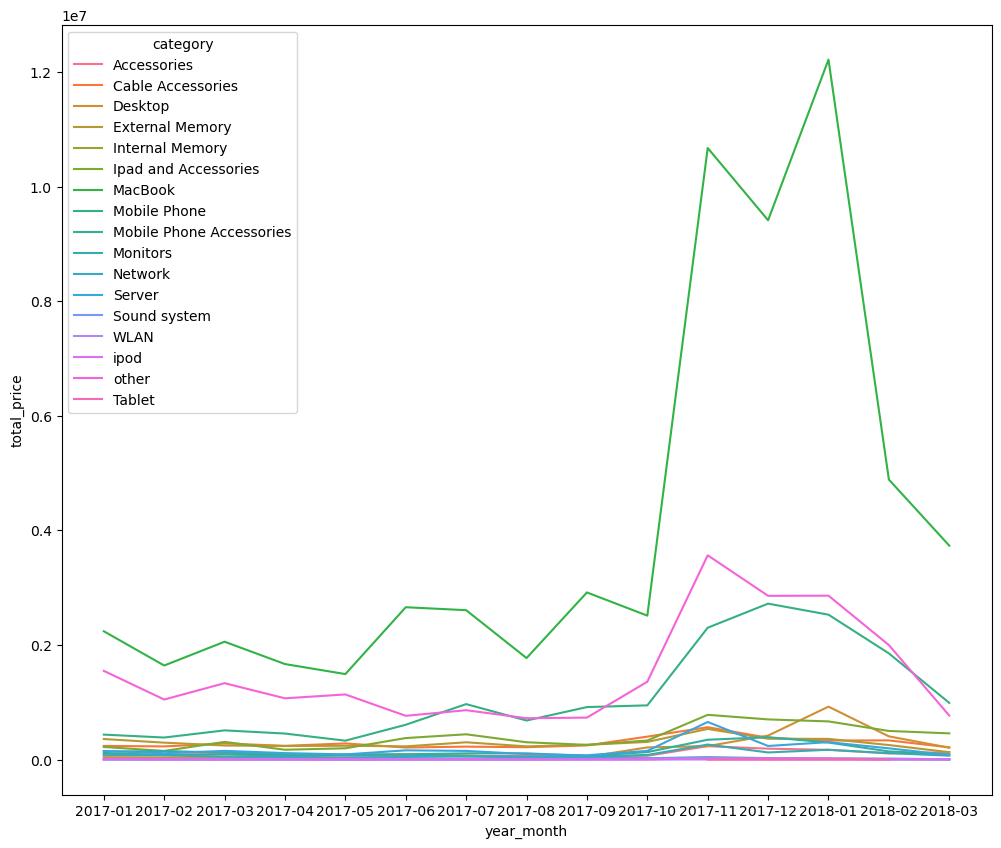

In [62]:
# plot categories and revenue
orders2['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines['date'])

orders_month_revenue=(orderlines2
              .filter(["id_order","sku","unit_price", 'total_price'])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
              .groupby(['year_month', 'category'])
              .agg({'id_order':'count','total_price':'sum'})
              .dropna()
              .reset_index())
plt.subplots(figsize=(12, 10))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_revenue, hue='category')


## Categories unit price and revenue 

<AxesSubplot:xlabel='year_month', ylabel='unit_price'>

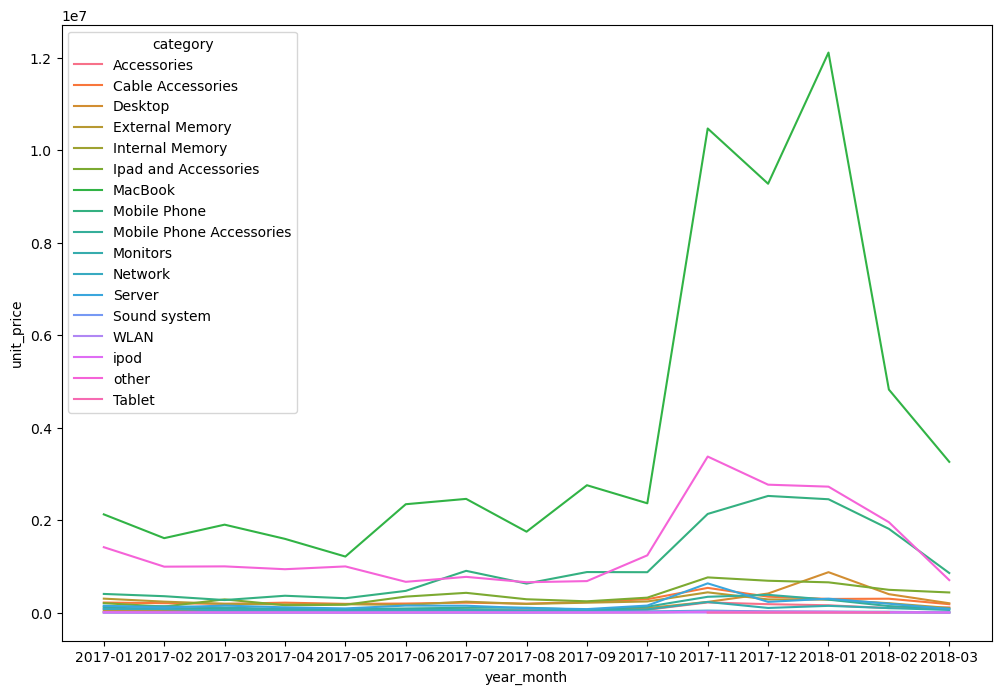

In [63]:
# plot unit price and categories (we are not using this one on the presentation)
import matplotlib.pyplot as plt
import seaborn as sns


orders_month_unit_price=(orderlines2
              .filter(["id_order","sku","unit_price"])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month=orderlines2.date.dt.strftime('%Y-%m'))
              .groupby(['year_month', 'category'])
              .agg({'id_order':'count','unit_price':'sum'})
              .dropna()
              .reset_index())
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'unit_price', data=orders_month_unit_price, hue='category')


## Which are top 5 categories

In [64]:
orders_month1=(orderlines2
              .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
              .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
              .assign(year_month_day=orderlines.date.dt.strftime('%Y-%m-%d'))
              .groupby(['category'])
              .agg({'id_order':'count','total_price':'sum', 'product_quantity':'count'})
              .sort_values('total_price', ascending=False)
              .dropna()
              .reset_index())
orders_month1.head(20)

,category,id_order,total_price,product_quantity
0,MacBook,26454,62493835.42,26454
1,other,92670,22627641.40,92670
2,Mobile Phone,36954,16632238.88,36954
3,Ipad and Accessories,17578,5864519.53,17578
4,Cable Accessories,18108,4399448.25,18108
5,External Memory,34176,4350302.61,34176
6,Desktop,10743,2888716.66,10743
7,Server,4928,2728483.85,4928
8,Mobile Phone Accessories,28163,2214453.67,28163
9,Monitors,4577,1657290.78,4577


## Plotting top 5 categories product quantity and revenue

In [65]:
# plot top 5 categories 
orders_month_top5 = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accessories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'sum', 'product_quantity':'count'})
                      .dropna()
                      .reset_index())

orders_month_top5.head(10)


,year_month,category,total_price,product_quantity
0,2017-01,Cable Accessories,238056.55,1697
1,2017-01,External Memory,358682.96,3761
2,2017-01,Ipad and Accessories,219747.73,1182
3,2017-01,Mobile Phone,436047.00,1976
4,2017-01,other,1548449.57,7026
5,2017-02,Cable Accessories,229862.88,1060
6,2017-02,External Memory,295446.63,2660
7,2017-02,Ipad and Accessories,151159.20,587
8,2017-02,Mobile Phone,385129.96,1268
9,2017-02,other,1048322.48,4470


<AxesSubplot:xlabel='year_month', ylabel='product_quantity'>

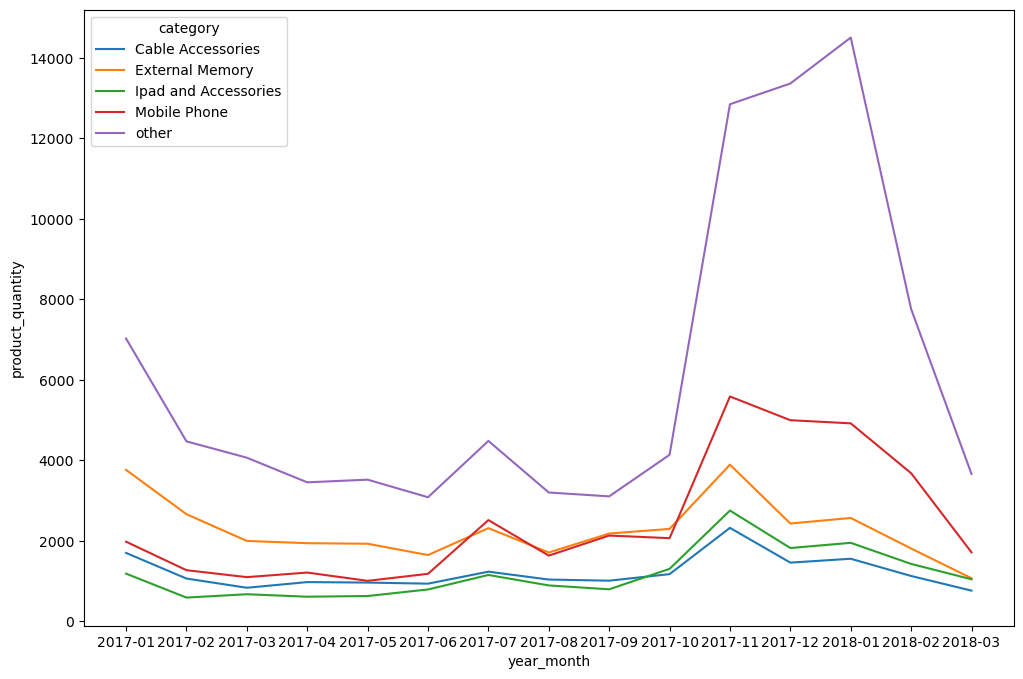

In [66]:
# plot the quantity of products on each category 
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'product_quantity', data=orders_month_top5, hue='category')

<AxesSubplot:xlabel='year_month', ylabel='total_price'>

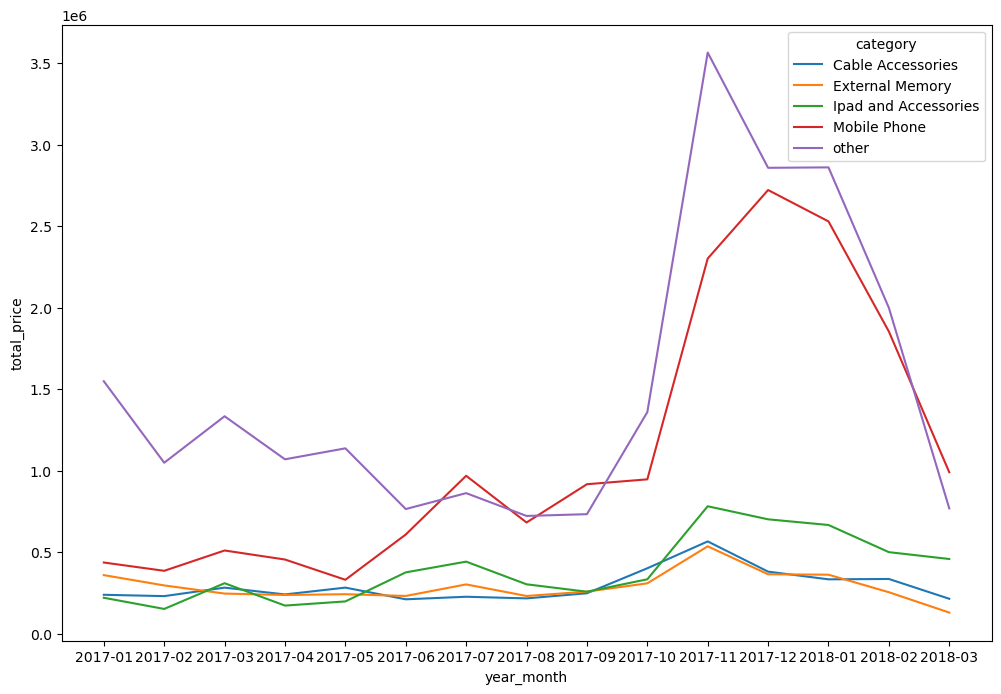

In [67]:
# plot revenue across top 5 categories
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_top5, hue='category')

In [68]:
# plot top 5 categories based on mean
orders_month_top5_mean = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines2.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accesories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'mean', 'product_quantity':'count'})
                      .dropna()
                      .reset_index()
)

### Plot of categories and mean revenue

<AxesSubplot:xlabel='year_month', ylabel='total_price'>

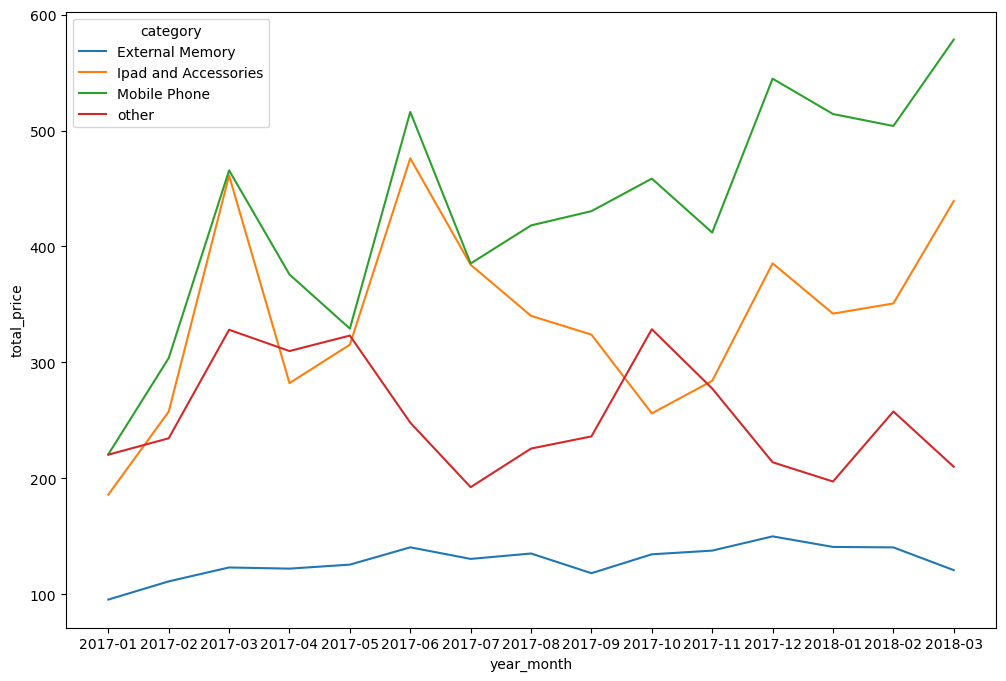

In [69]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_price', data=orders_month_top5_mean, hue='category')

### Categories sold per year

In [70]:
# plot  number of products on each category sold each year (please consider that year 2018 goes only until march ) 
orders_sold_categories_y = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year = orderlines.date.dt.strftime('%Y'))
                      .groupby(['year', 'category'])
                      .agg({'product_quantity':'sum'})
                      .dropna()
                      .reset_index()
                      )

orders_sold_categories_y.head(10)

,year,category,product_quantity
0,2017,Accessories,12680
1,2017,Cable Accessories,16734
2,2017,Desktop,7473
3,2017,External Memory,37421
4,2017,Internal Memory,625
5,2017,Ipad and Accessories,14298
6,2017,MacBook,18776
7,2017,Mobile Phone,29868
8,2017,Mobile Phone Accessories,22989
9,2017,Monitors,4314


<AxesSubplot:xlabel='year', ylabel='product_quantity'>

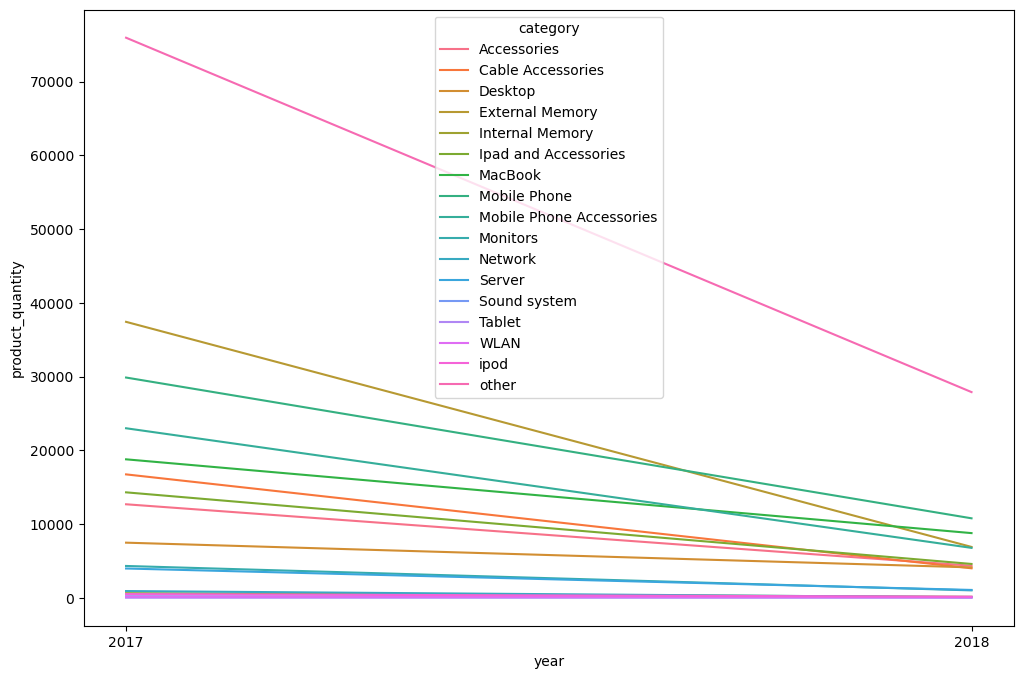

In [71]:
# plot  number of products sold each year (please consider that year 2018 goes only until march )
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year', y = 'product_quantity', data=orders_sold_categories_y, hue='category')

### Categories sold per month

<AxesSubplot:xlabel='month', ylabel='product_quantity'>

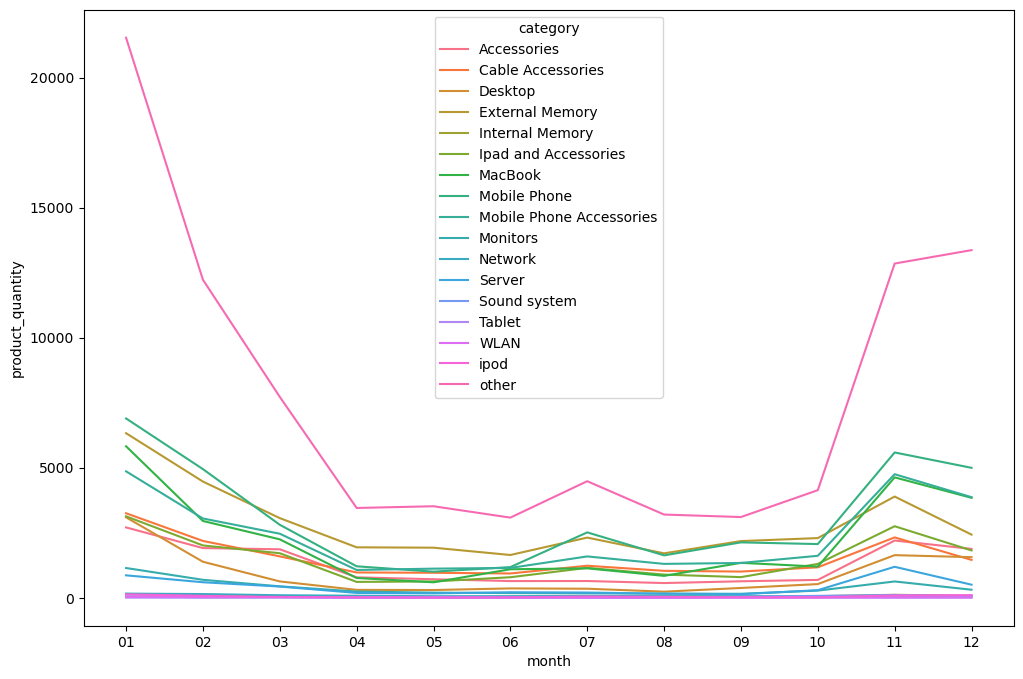

In [72]:
# number of products categories sold each month
orders_sold_categories_m = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(month = orderlines.date.dt.strftime('%m'))
                      .groupby(['month', 'category'])
                      .agg({'product_quantity':'count'})
                      .dropna()
                      .reset_index())

orders_sold_categories_m.head(10)
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'month', y = 'product_quantity', data=orders_sold_categories_m, hue='category')

### Categories and groupsize

In [73]:
# top5 groupsize
orders_top5_groupsize = (orderlines2
                      .filter(["id_order","sku","unit_price", 'total_price', 'product_quantity'])
                      .merge(products.filter(["sku","desc","max_price_orderlines", "category", 'total_price']), on="sku", how="left")
                      .assign(year_month = orderlines.date.dt.strftime('%Y-%m'))
                      .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accesories"]')
                      .groupby(['year_month', 'category'])
                      .agg({'total_price':'sum', 'id_order':'count'})
                      .dropna()
                      .reset_index()
                      .assign(revenue_groupsize = lambda x: x["total_price"] / x["id_order"])
                      )

<AxesSubplot:xlabel='year_month', ylabel='revenue_groupsize'>

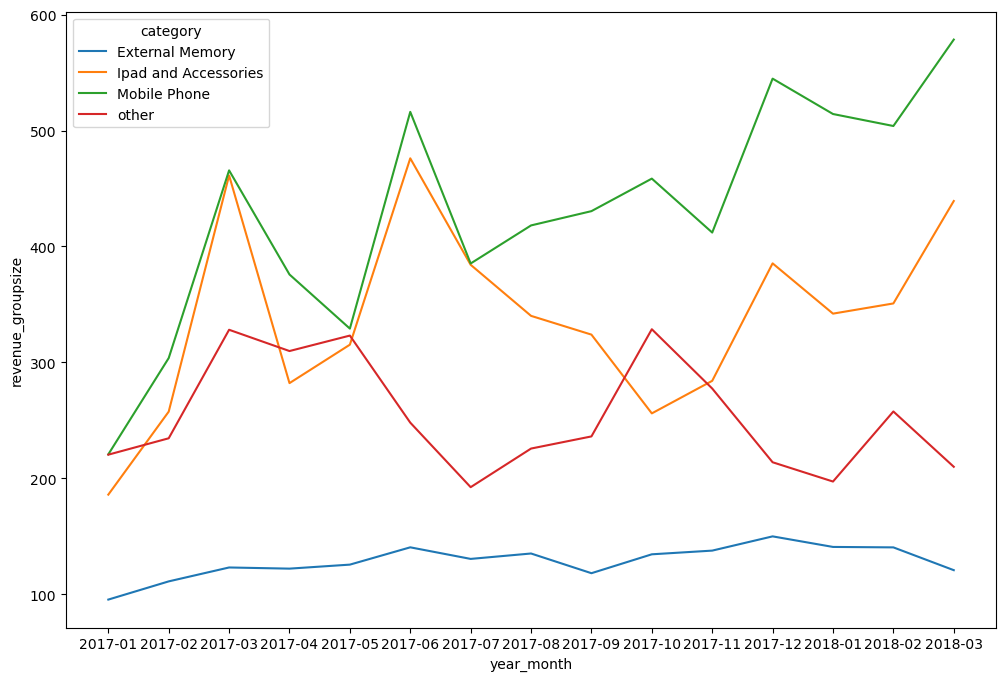

In [74]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'revenue_groupsize', data=orders_top5_groupsize, hue='category')

# Create Discounts Columns in Orderlines:

In [76]:
discounts = (
orderlines2
.filter(["id_order","sku","unit_price", "date", "total_price"])
.merge(products.filter(["sku","desc", "price"]), on="sku", how="left")
.assign(disc = lambda x: x["price"] - x["unit_price"])
.assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 ) 
.assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
.copy()
)
discounts

,id_order,sku,unit_price,date,total_price,desc,price,disc,disc_perc,year_month
0,299539,OTT0133,18.99,2017-01-01 00:07:19,18.99,resistant cover and thin beveled edges for iPhone SE / 5s / 5,34.99,16.00,45.73,2017-01
1,299540,LGE0043,399.00,2017-01-01 00:19:45,399.00,Monitor for gamers and multimedia professional use with two HDMI ports for Mac and PC,429.00,30.00,6.99,2017-01
2,299541,PAR0071,474.05,2017-01-01 00:20:57,474.05,cuadricóptero wireless remote control with 25 minutes of autonomous control FLYPAD and FPV Glass...,699.00,224.95,32.18,2017-01
3,299542,WDT0315,68.39,2017-01-01 00:51:40,68.39,Internal Hard Drive Western Digital 2TB 3.5-inch SATA 6Gb / s for Mac and PC users.,79.00,10.61,13.43,2017-01
4,299543,JBL0104,23.74,2017-01-01 01:06:38,23.74,Compact Bluetooth Handsfree for iPhone iPad and iPod speaker.,29.90,6.16,20.60,2017-01
...,...,...,...,...,...,...,...,...,...,...
293738,527398,JBL0122,42.99,2018-03-14 13:57:25,42.99,Wireless headphones with folding design with 11 hours of battery life and built-in microphone fo...,49.95,6.96,13.93,2018-03
293739,527399,PAC0653,141.58,2018-03-14 13:57:34,141.58,"SSD upgrade kit 2008-2010 250 GB MacBook and MacBook Pro Tools 2009-2012,",215.98,74.40,34.45,2018-03
293740,527400,APP0698,9.99,2018-03-14 13:57:41,19.98,Apple Lightning USB Cable 1 meter to charge and sync iPhone iPad and iPod,25.00,15.01,60.04,2018-03
293741,527388,BEZ0204,19.99,2018-03-14 13:58:01,19.99,Macbook thin sheath 12 inches.,29.99,10.00,33.34,2018-03


In [77]:
# create table with total prices grouped first by year-month
discount_agg_year_month_sum = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc", "price"]), on="sku", how="left")
    .assign(disc = lambda x: x["price"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 ) 
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'sum'})
    .reset_index()
) 
discount_agg_year_month_sum

,year_month,unit_price,disc,disc_perc,total_price
0,2017-01,1.28,5.71,81.69,1.28
1,2017-01,2.31,7.68,76.88,2.31
2,2017-01,2.54,4.45,63.66,2.54
3,2017-01,2.69,4.30,61.52,2.69
4,2017-01,2.84,4.15,59.37,2.84
...,...,...,...,...,...
44589,2018-03,8045.00,334.00,3.99,8045.00
44590,2018-03,9656.00,403.00,4.01,28968.00
44591,2018-03,10052.07,2886.93,22.31,10052.07
44592,2018-03,14419.00,920.00,6.00,28838.00


In [78]:
discount_agg_year_month_mean = (
orderlines2
    .filter(["id_order","sku","unit_price", 'date', 'total_price'])
    .merge(products.filter(["sku","desc", "price"]), on="sku", how="left")
    .assign(disc = lambda x: x["price"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 )
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .dropna()
    .groupby(['year_month', 'unit_price', 'disc', 'disc_perc'])
    .agg({'total_price':'mean'})
    .reset_index()
) 

discount_agg_year_month_mean

,year_month,unit_price,disc,disc_perc,total_price
0,2017-01,1.28,5.71,81.69,1.28
1,2017-01,2.31,7.68,76.88,2.31
2,2017-01,2.54,4.45,63.66,2.54
3,2017-01,2.69,4.30,61.52,2.69
4,2017-01,2.84,4.15,59.37,2.84
...,...,...,...,...,...
44589,2018-03,8045.00,334.00,3.99,8045.00
44590,2018-03,9656.00,403.00,4.01,9656.00
44591,2018-03,10052.07,2886.93,22.31,10052.07
44592,2018-03,14419.00,920.00,6.00,14419.00


# Analyse Discounts

In [79]:
# define filter to make discount categories: 
def filter(x):
    if x == 0: 
      return "no discount"
    if (x > 0 and x <= 20):
        return '<=20%'
    if (x > 20 and x <= 40):
        return '21% - 40%'
    if (x > 40 and x <= 60):
        return '41% - 60%'
    if (x > 60 and x <= 80):
      return '61% - 80%'
    if(x > 80 and x <= 100):
      return '81% - 100%'

# apply the categories on the generated discount datasets: 

discount_agg_year_month_sum['discount_category'] = discount_agg_year_month_sum['disc_perc'].apply(filter).sort_values()
discount_agg_year_month_mean['discount_category'] = discount_agg_year_month_mean['disc_perc'].apply(filter).sort_values()
discounts['discount_category'] = discounts['disc_perc'].apply(filter).sort_values()
discount_agg_year_month_mean.rename(columns={
    'total_price': 'average_price'},
    inplace=True)

In [80]:
discount_agg_year_month_mean

,year_month,unit_price,disc,disc_perc,average_price,discount_category
0,2017-01,1.28,5.71,81.69,1.28,81% - 100%
1,2017-01,2.31,7.68,76.88,2.31,61% - 80%
2,2017-01,2.54,4.45,63.66,2.54,61% - 80%
3,2017-01,2.69,4.30,61.52,2.69,61% - 80%
4,2017-01,2.84,4.15,59.37,2.84,41% - 60%
...,...,...,...,...,...,...
44589,2018-03,8045.00,334.00,3.99,8045.00,<=20%
44590,2018-03,9656.00,403.00,4.01,9656.00,<=20%
44591,2018-03,10052.07,2886.93,22.31,10052.07,21% - 40%
44592,2018-03,14419.00,920.00,6.00,14419.00,<=20%


In [81]:
# check if there are any orders within discount category 61 - 80 %
#discount_agg_year_month_sum.loc[discount_agg_year_month_sum['discount_category'] == '61% - 80%', :]

(0.0, 400.0)

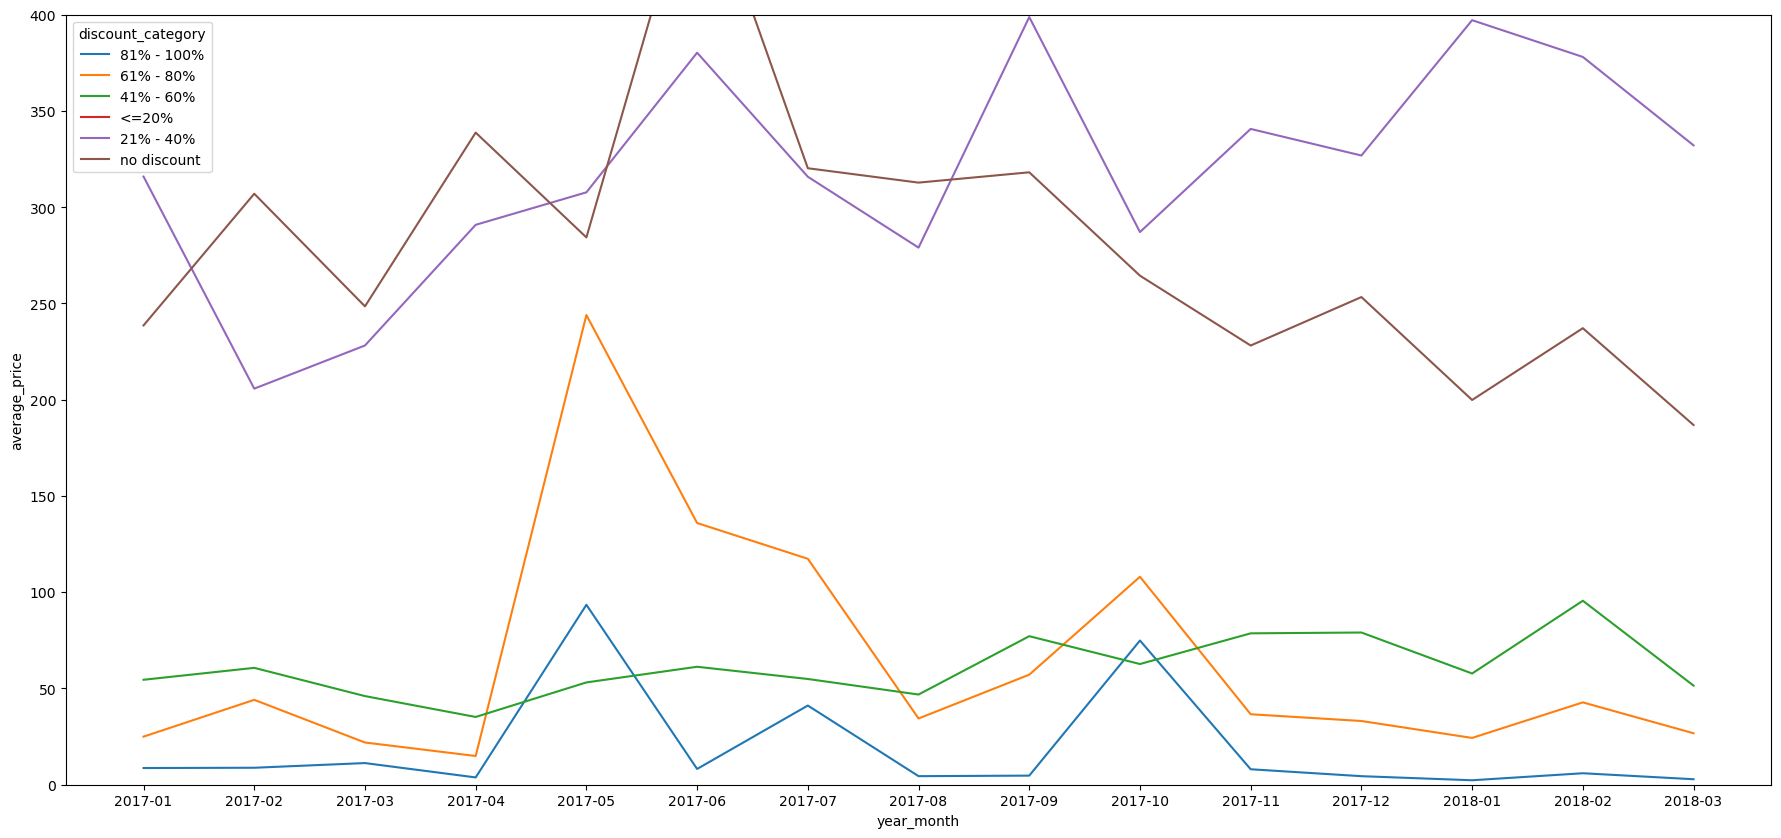

In [82]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x= 'year_month', y ='average_price', hue='discount_category', ci=None, data=discount_agg_year_month_mean)
plt.ylim(0, 400)

<AxesSubplot:xlabel='year_month', ylabel='disc_perc'>

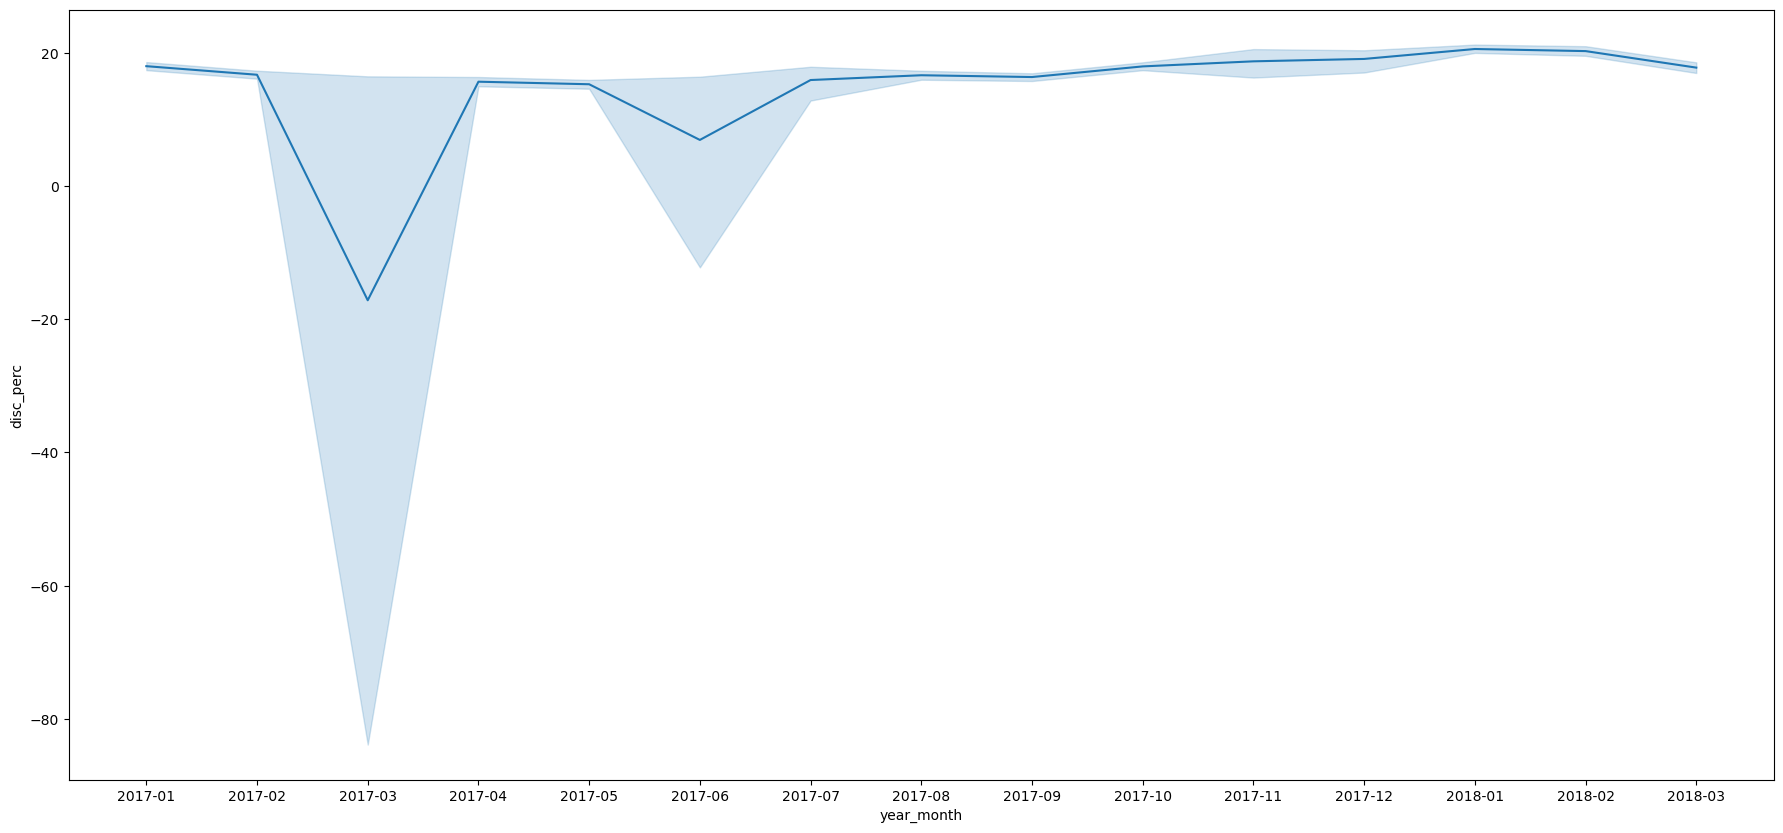

In [83]:
plt.subplots(figsize=(22, 10))
sns.lineplot(x='year_month', y ='disc_perc', data=discount_agg_year_month_sum)

In [84]:
#do not delete
top_products =  (
orderlines2
.filter(["id_order","sku","unit_price", "date", "total_price"])
.merge(products.filter(['name', "sku","desc", "price"]), on="sku", how="left")
.assign(disc = lambda x: x["price"] - x["unit_price"])
.assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["price"])) * 100 ) 
.assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
.copy()
.groupby(['year_month', 'sku', 'name', 'desc', 'disc'])
.agg({'total_price':'sum'})
.sort_values(by='total_price', ascending = False)
.reset_index()
            )
    
top_products['discount_status'] = top_products.apply(lambda row: False if row['disc'] == 0 else True, axis = 1)
top_products.head(100)

,year_month,sku,name,desc,disc,total_price,discount_status
0,2018-01,APP1216,Apple Magic Trackpad 2,Apple Wireless Bluetooth Trackpad.,19.00,312780.00,True
1,2017-10,APP2018,Apple Mac Pro 35GHz 6 cores | 16GB RAM | 256GB PCIe SSD,New Mac Pro with 16GB of RAM and two 6-core GPU 35GHz AMD FirePro D500 (MD878Y / A),200.00,296258.69,True
2,2017-12,APP2489,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,0.00,282796.00,False
3,2017-09,APP1956,"Apple MacBook Pro Retina 13 ""Core i7 3GHz | 8GB RAM | 1TB SSD (as of MF839Y setup / A)",MacBook Pro early 2015 with Retina display 13-inch extension to i7 3GHz,963.41,258199.37,True
4,2018-01,APP0662,IMac AppleCare Protection Plan,Apple Care extended warranty for iMac.,41.00,250746.00,True
5,2018-01,APP2489,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,20.00,242607.00,True
6,2018-02,APP2489,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,35.00,233792.00,True
7,2017-03,PAC0874,Apple Mac Pro 12-core 27GHz | 64GB RAM | 1TB Flash | FirePro D700 6GB,New Mac Pro with 64GB RAM 1TB GPU 12 cores 2 Flash (MD878Y / A).,1287.01,226365.77,True
8,2018-01,APP2637,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz | 32GB | 1TB SSD | Radeon Pro Vega 56",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor 3.2GHz W,381.00,184248.00,True
9,2018-01,APP2074,"Apple MacBook Pro 15 ""Core i7 Touch Bar 28GHz | RAM 16GB | 256GB PCIe SSD | 555 2GB Radeon Pro S...",New MacBook Pro 15-inch Touch Bar to 28GHz Core i7 with 16GB of RAM and 256GB PCIe SSD,307.00,182397.07,True


In [85]:
products_top_sku = top_products.query('sku==["APP2479"]')
products_top_sku.groupby('year_month')

<AxesSubplot:xlabel='year_month', ylabel='total_price'>

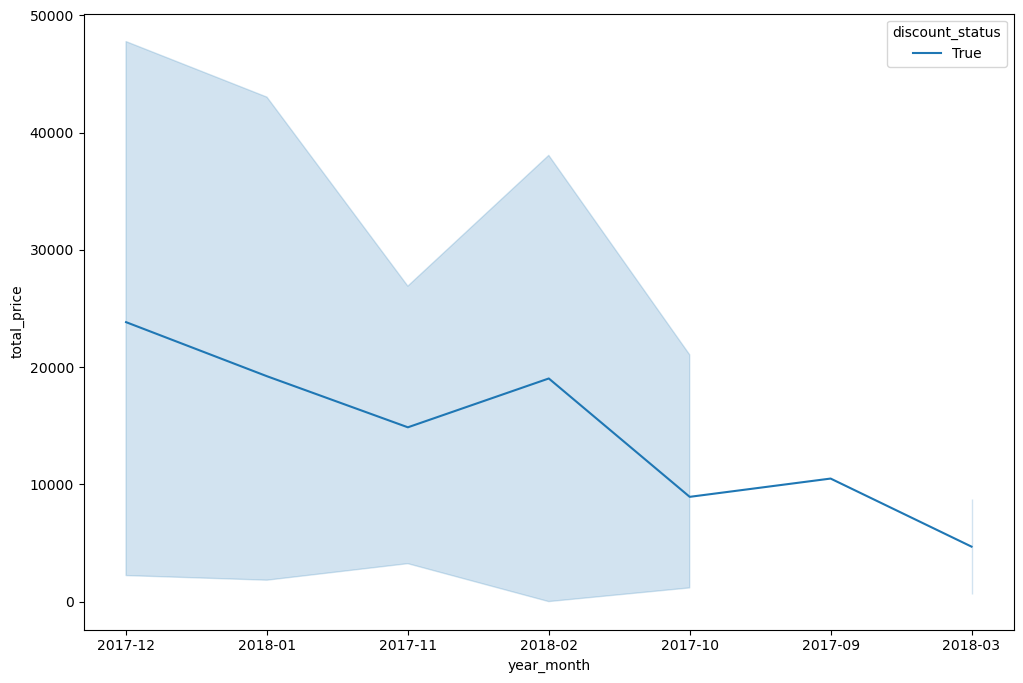

In [86]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x='year_month', y ='total_price', data=products_top_sku, hue='discount_status')

### All product categories and the discount they had

(0.0, 60.0)

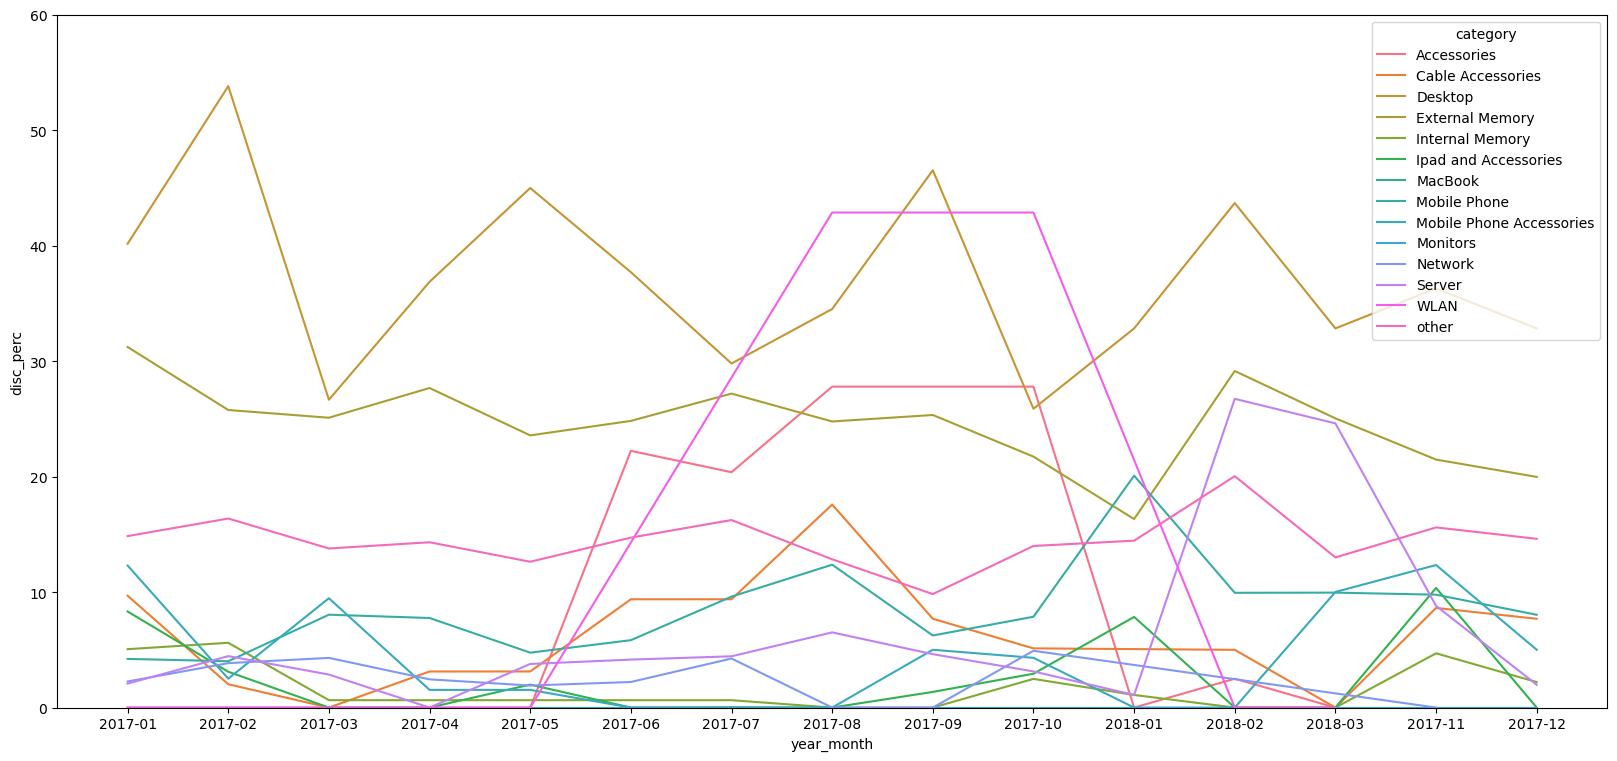

In [244]:
disc_quantity_allcat=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines", "category"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .groupby(['category', 'year_month', 'disc_perc'])
    .agg({'product_quantity':'count','total_paid':'sum'})
    .reset_index()
    .dropna()
    ) 
disc_quantity_allcat.head(10)

plt.subplots(figsize=(20, 9))
sns.lineplot(x= 'year_month', y = 'disc_perc', data=disc_quantity_allcat, hue='category', ci=None)
plt.ylim(0, 60)

### What discount did the top 5 product category have?

In [ ]:
disc_quantity=(
orderlines2
    .filter(["id_order","sku","unit_price",'product_quantity','date'])
    .assign(year_month=orderlines.date.dt.strftime('%Y-%m'))
    .merge(products.filter(["sku","desc","max_price_orderlines", "category"]), on="sku", how="left")
    .assign(disc = lambda x: x["max_price_orderlines"] - x["unit_price"])
    .assign(disc_perc = lambda x: (1- (x["unit_price"]/ x["max_price_orderlines"])) * 100 )
    .merge(orders2.filter(['order_id','total_paid']), how='left',left_on='id_order',right_on='order_id')
    .query('category==["other", "Mobile Phone", "External Memory", "Ipad and Accessories", "Cable Accessories"]')
    .groupby(['category', 'year_month', 'disc_perc'])
    .agg({'product_quantity':'count','total_paid':'sum'})
    .reset_index()
    .dropna()
    ) 
disc_quantity.head(10)

In [ ]:
plt.subplots(figsize=(20, 9))
sns.lineplot(x= 'year_month', y = 'disc_perc', data=disc_quantity, hue='category', ci=None)
plt.ylim(0, 40)

In [ ]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x= 'year_month', y = 'total_paid', data=disc_quantity, hue='category', ci=None)


# Exploring Revenue over time

In [291]:
orders_compl = orders2.query('state == "Completed"')

In [292]:
p_df = (
orders_compl
    # create year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
)
p_df

,order_id,created_date,total_paid,state,check_orders,seasons,quarters,year,month
1,241423,2017-11-01,136.15,Completed,True,2017-autumn,2017-Q3,2017,Nov
2,242832,2017-12-01,15.76,Completed,True,2017-winter,2017-Q4,2017,Dec
3,243330,2017-02-01,84.98,Completed,True,NaN,2017-Q1,2017,Feb
5,245275,2017-06-01,149.00,Completed,True,2017-summer,2017-Q2,2017,Jun
6,245595,2017-01-01,112.97,Completed,True,NaN,2017-Q1,2017,Jan
...,...,...,...,...,...,...,...,...,...
204403,527042,2018-03-01,18.98,Completed,True,NaN,2018-Q1,2018,Mar
204423,527070,2018-03-01,24.97,Completed,True,NaN,2018-Q1,2018,Mar
204426,527074,2018-03-01,24.97,Completed,True,NaN,2018-Q1,2018,Mar
204444,527096,2018-03-01,34.96,Completed,True,NaN,2018-Q1,2018,Mar


In [293]:
(
p_df
    # select this 3 columns
    .filter(['year','month','total_paid'])
    # apply the describe function to this two groups
    .groupby(['year','month'])
    .describe()
)

total_paid                                                 
                count   mean     std  min   25%    50%    75%      max
year month                                                            
2017 Apr      1632.00 298.38  614.30 4.99 49.99  89.99 262.98  9423.90
     Aug      2350.00 307.26  599.39 7.78 51.10 109.99 317.23 10586.97
     Dec      5506.00 344.63  585.87 6.98 49.98 119.98 362.97  6657.46
     Feb      2273.00 274.48  520.73 3.99 42.98  94.97 254.98  4163.98
     Jan      5111.00 233.11  522.33 0.00 37.93  72.96 174.98  7230.97
     Jul      3438.00 327.86  602.56 7.48 44.98 110.97 365.99  7216.77
     Jun      1603.00 430.47  752.93 8.89 54.98 137.98 419.98  6698.00
     Mar       202.00 573.95 1208.63 2.82 39.99 106.98 326.74  9987.76
     May      1892.00 341.52  594.72 8.98 56.25 115.00 318.96  5335.00
     Nov      7187.00 410.39  683.62 6.53 71.48 161.23 418.98 13387.78
     Oct      3135.00 346.99  610.90 6.98 49.98 122.24 344.07  6227.77
     Sep      2180.00 395.04  682.26 6.98 52.20 131.78 380.38  7376.58
2018 Feb      3334.00 320.85  587.50 6.98 49.98 113.97 292.98  6034.97
     Jan      5202.00 376.94  665.62 6.48 53.99 112.97 362.99  7268.58
     Mar      1515.00 314.77  633.07 6.98 44.98  96.98 258.04  6656.98

We can see that most of our transactions have monthly median values around 100, but maximum values go up to 10,000 and the standard deviation is huge. So we have very different types of customers. 

A possible hypothesis is that we have a large group of low-paying customers who are end-users and a small group of 'whale' customers who are companies.

###  Zoom into the distribution of one month by filtering one month in our dataset:

In [294]:
p_df_jan = p_df.query('month == "Jan"')
p_df_jan

,order_id,created_date,total_paid,state,check_orders,seasons,quarters,year,month
6,245595,2017-01-01,112.97,Completed,True,NaN,2017-Q1,2017,Jan
10,247524,2018-01-01,167.98,Completed,True,2017-winter,2017-Q4,2018,Jan
20,254301,2017-01-01,35.91,Completed,True,NaN,2017-Q1,2017,Jan
24,254816,2017-01-01,283.83,Completed,True,NaN,2017-Q1,2017,Jan
32,258155,2018-01-01,40.76,Completed,True,2017-winter,2017-Q4,2018,Jan
...,...,...,...,...,...,...,...,...,...
183396,503419,2018-01-01,76.49,Completed,True,2017-winter,2017-Q4,2018,Jan
183402,503425,2018-01-01,24.98,Completed,True,2017-winter,2017-Q4,2018,Jan
183408,503431,2018-01-01,225.99,Completed,True,2017-winter,2017-Q4,2018,Jan
183411,503434,2018-01-01,1098.97,Completed,True,2017-winter,2017-Q4,2018,Jan


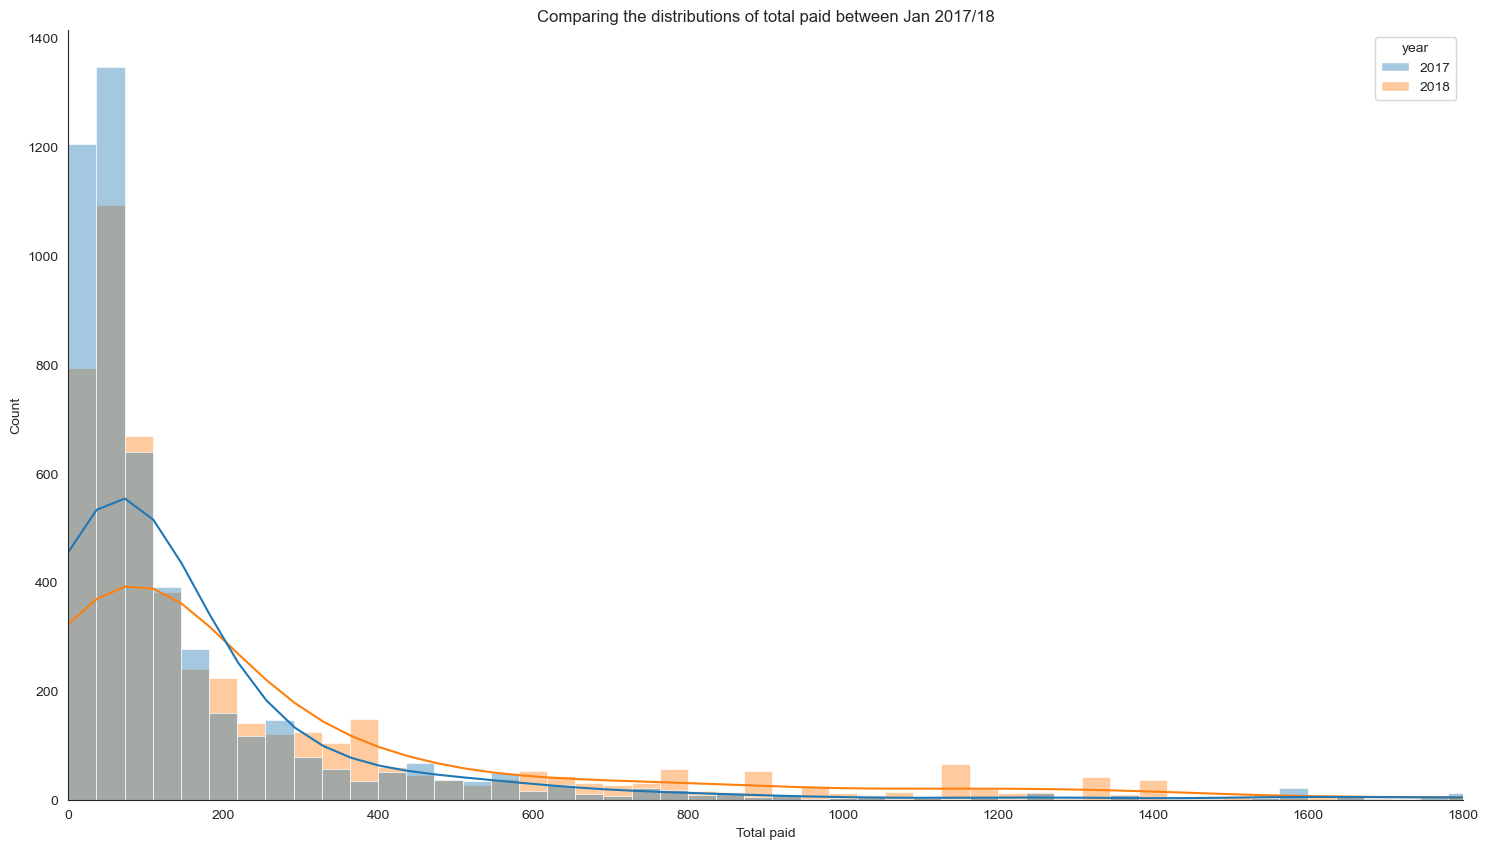

In [295]:
plt.subplots(figsize=(18, 10))

sns.histplot(data=p_df_jan, x='total_paid', hue='year', 
             alpha=.4, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=200 # define the number of bins the variable total paid will be grouped
            )
sns.set_style("white")

plt.xlim(0, 1800)
plt.title('Comparing the distributions of total paid between Jan 2017/18')
plt.xlabel('Total paid')
sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")

--> Looking at these distributions, we can see that in 2017 there were more orders with a smaller `total_paid`, while in 2018 we observe several spikes between 1000 and 1500, indicating that there were more expensive orders. 
We check this: 

In [296]:
p_df_jan.groupby('year').agg({'total_paid':['mean','median','std']})

total_paid              
           mean median    std
year                         
2017     233.11  72.96 522.33
2018     376.94 112.97 665.62

--> The theory is confirmed when we aggregate the data. The standard deviation for 2018 also shows us that there is a higher dispersion compared to 2017, caused mainly but these orders around 1250 euros.

### What are the top products for January? 

In [297]:
# we already have the completed orders for January of both years in our p_df_jan, 
# let's locate them on the orderlines dataset:

p_sku_jan = (
orderlines
    .loc[orderlines['id_order'].isin(p_df_jan['order_id'])] # filter all the orders id in orderlines for month of january (2017 and 2018)
    .assign(year = orderlines['date'].dt.strftime('%Y')) # create year column
    .groupby(['year','sku']) # group by year and sku
    .agg({'unit_price':'sum'}) # aggregate using the sum of the "unit price"
    .reset_index() # reset index so "year" and "sku" become columns
    .sort_values('unit_price', ascending=False) # order by "unit price" to get top products
    .groupby('year') # group by year because we want the top products for each year
    .head(10) # get the first 10 products for each year
)
p_sku_jan

,year,sku,unit_price
2370,2018,APP2490,57099.45
2371,2018,APP2491,50301.34
2255,2018,APP2074,50154.26
2369,2018,APP2489,45337.70
2373,2018,APP2492,38541.00
2425,2018,APP2637,35826.00
3456,2018,PAC2119,25979.77
2256,2018,APP2075,23829.55
1323,2017,PAC1240,21966.00
3463,2018,PAC2136,20970.90


In [298]:
p_sku_jan = p_sku_jan.merge(products, how='left')
p_sku_jan

,year,sku,unit_price,name,desc,price,type,max_price_orderlines,category
0,2018,APP2490,57099.45,Apple iPhone 64GB X Silver,New Apple iPhone 64GB Free Silver X,NaN,113271716,1159.00,Mobile Phone
1,2018,APP2491,50301.34,Apple iPhone X 256GB Space Gray,New Apple iPhone X 256GB Free Space Gray,NaN,113271716,1329.00,Mobile Phone
2,2018,APP2074,50154.26,"Apple MacBook Pro 15 ""Core i7 Touch Bar 28GHz | RAM 16GB | 256GB PCIe SSD | 555 2GB Radeon Pro S...",New MacBook Pro 15-inch Touch Bar to 28GHz Core i7 with 16GB of RAM and 256GB PCIe SSD,2805.59,"1,02E+12",NaN,MacBook
3,2018,APP2489,45337.70,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,1159.00,113271716,NaN,Mobile Phone
4,2018,APP2492,38541.00,Apple iPhone X 256GB Silver,New Apple iPhone X 256GB Silver Free,NaN,113271716,1329.00,Mobile Phone
5,2018,APP2637,35826.00,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz | 32GB | 1TB SSD | Radeon Pro Vega 56",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor 3.2GHz W,5499.00,118692158,NaN,Desktop
6,2018,PAC2119,25979.77,"Apple iMac 27 ""Core i7 Retina 5K 42GHz | 32GB | 512GB SSD",IMac desktop computer 27 inch Retina 5K RAM 32GB SSD 512GB PCle,3799.00,"5,74E+15",NaN,MacBook
7,2018,APP2075,23829.55,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz | RAM 16GB | 512GB PCIe SSD | 560 4GB Radeon Pro S...",New MacBook Pro 15-inch Core i7 Touch Bar 29Ghz with 16GB of RAM and 512GB of SSD PCIe,3305.59,"1,02E+12",NaN,MacBook
8,2017,PAC1240,21966.00,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 525GB SSD",Apple MacBook Pro 133 inches (MD101Y / A) with extended RAM and SSD.,1899.00,1282,NaN,other
9,2018,PAC2136,20970.90,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB | 1TB Fusion",IMac desktop computer 27 inch 5K Retina 16GB (4x4GB) RAM 1TB Fusion,2339.00,"5,74E+15",NaN,MacBook


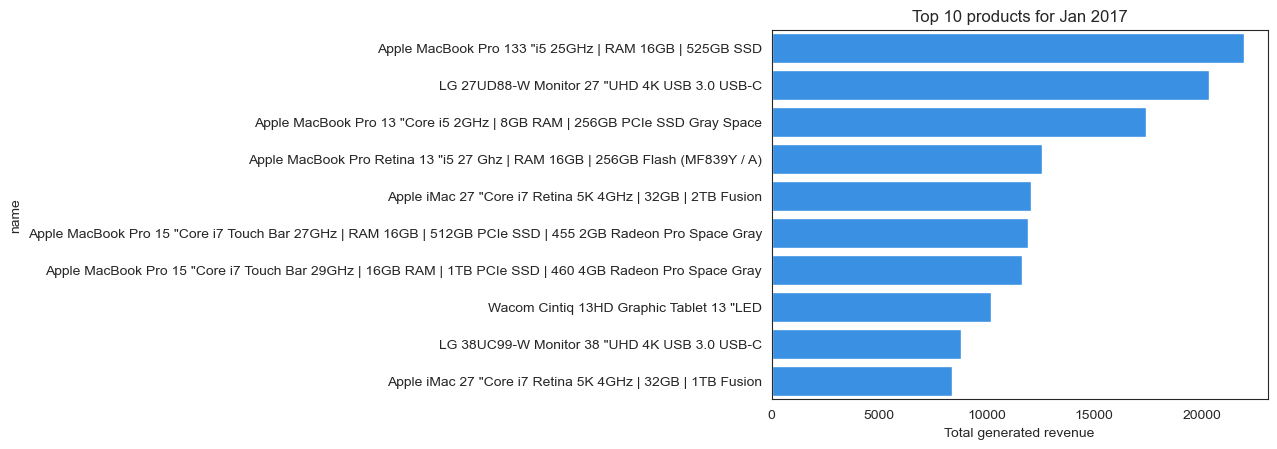

In [299]:
# data for 2017
year = "2017"
data_2017 = p_sku_jan.loc[p_sku_jan['year'] == year]

# plot for 2017
sns.barplot(data= data_2017, 
            x='unit_price', 
            y='name',
            color='dodgerblue')

plt.title('Top 10 products for Jan ' + year)
plt.xlabel('Total generated revenue')
plt.show()

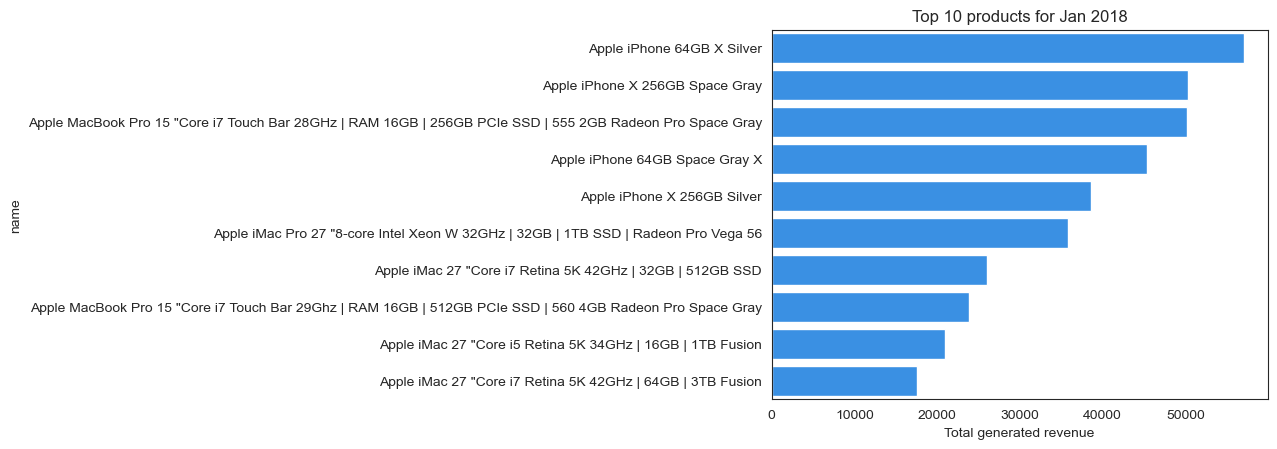

In [300]:
# data for 2018
year = "2018"
data_2018 = p_sku_jan.loc[p_sku_jan['year'] == year]

# plot for 2018
sns.barplot(data= data_2018, 
            x='unit_price', 
            y='name',
            color='dodgerblue')

plt.title('Top 10 products for Jan ' + year)
plt.xlabel('Total generated revenue')
plt.show()

### Showing the total number of Apple products sold for each month
We saw above that the top 10 products for 2018 was composed of significantly more Apple products than the same top 10 for 2017. I'd like to investigate this business trend further.


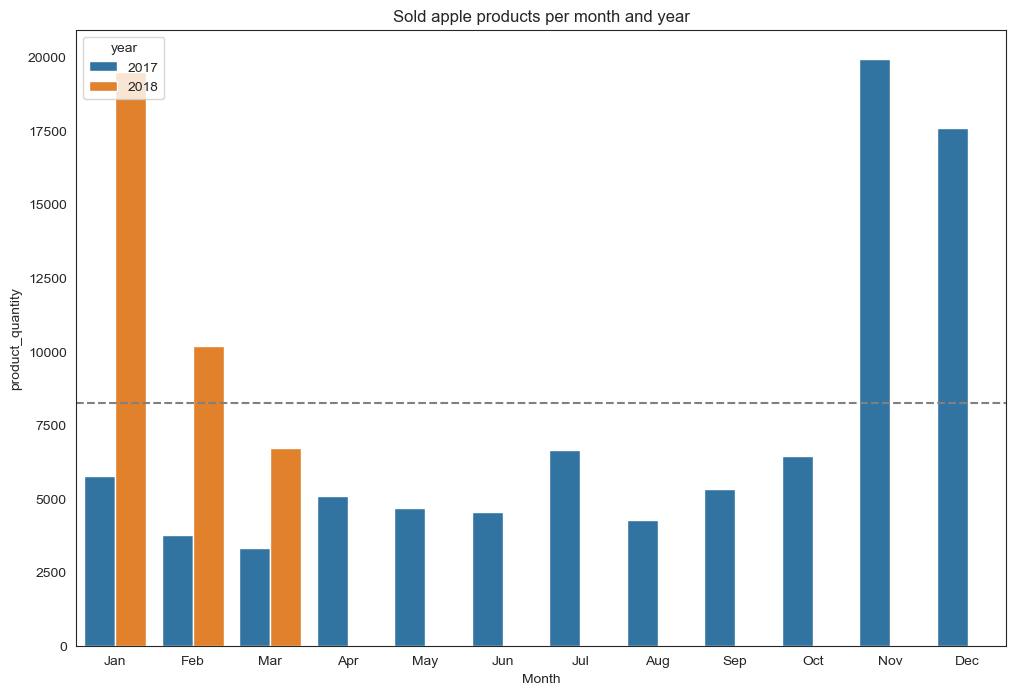

In [301]:
# preparing the dataset: 
# 1) merge orderlines and products, 2) make a column with year and months 3) make a column that counts all apple products 3) group by year and month and then apply plot: 
apple_df = (
orderlines2
    # create two new columns in our dataframe; year and month
    .assign(year = orderlines['date'].dt.strftime('%Y'), 
           month = orderlines['date'].dt.strftime('%b'))
    #merge with products table
    .merge(products, how='left')
)
# filter out apple.products
apple_df = (
apple_df
    .assign(apple_product = apple_df['name'].str.contains('apple', case=False))
    .query('apple_product == True')
    .groupby(['year','month'])
    .agg({'product_quantity': 'sum'})
    .reset_index()
)


# our main plot
plt.subplots(figsize=(12, 8))

apple = sns.barplot(
    data=apple_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='product_quantity', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)
# add a horizontal reference line into the chart to know where the mean value will be
apple.axhline(
    apple_df['product_quantity'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Month') # x label name
plt.ylabel('product_quantity') # y label name
plt.title('Sold apple products per month and year') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

### Headline

ValueError: Could not interpret value `order_id` for parameter `y`

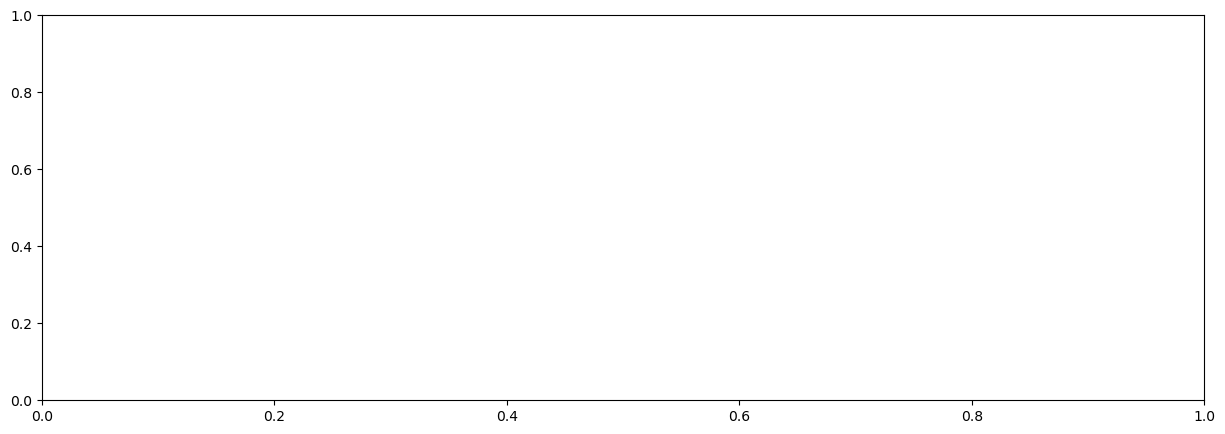

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
#orders.query('state == "Completed"')
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

#discounts.assign(no_discount = lambda x: True if x['disc'] == 0)

#orders_month=(orders
 #             .assign(year_month=orders.created_date.dt.strftime('%Y-%m'))
  #            .query('state=="Completed"')
   #           .groupby('year_month')
    #          .agg({'order_id':'count','total_paid':'sum'})
     #         .reset_index())
#orders_month.head(10)
plt.subplots(figsize=(15,5))
#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=discounts, x='year_month',y='order_id',palette='colorblind')
p.axhline(
    orders_month['order_id'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Order Numbers') 
plt.title('How sales evolution through 2017 and 2018') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

## Revenue over time in months 

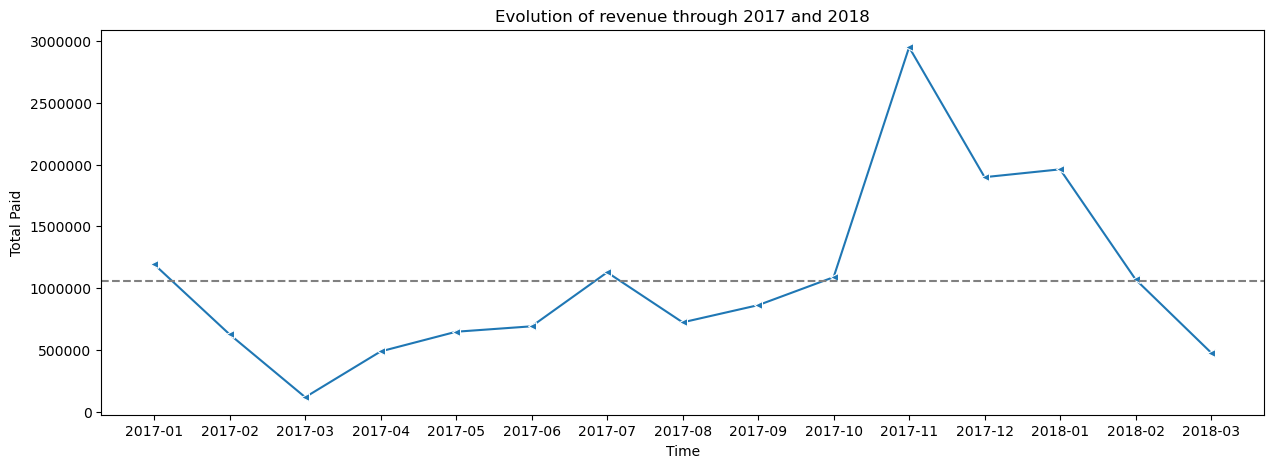

In [89]:
orders_month=(orders2
              .assign(year_month=orders.created_date.dt.strftime('%Y-%m'))
              .query('state=="Completed"')
              .groupby('year_month')
              .agg({'total_paid':'sum'})
              .reset_index())

plt.subplots(figsize=(15,5))

#p=sns.barplot(data=orders_month,x='year_month',y='total_paid',palette='colorblind')
p=sns.lineplot(data=orders_month,x='year_month',y='total_paid',marker='<')


p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Total Paid') 
plt.title('Evolution of revenue through 2017 and 2018') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


## Revenue in months as relative numbers

In [272]:
from pandas._libs import index

orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2['date'] = pd.to_datetime(orderlines2['date'])
orderlines2_month=(orderlines2
              .assign(year_month=orderlines2['date'].dt.strftime('%Y-%m'))
              .assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
              .groupby('year_month')
              .agg({'total_paid':'sum'})
              .reset_index())
sum_totalpaid=sum(orderlines2_month.total_paid)

orderlines2_month['total_paid_perc']=orderlines2_month.apply(lambda x: (x['total_paid']/128659393.77)*100, axis=1)
orderlines2_month

,year_month,total_paid,total_paid_perc
0,2017-01,5739694.72,4.46
1,2017-02,4354114.34,3.38
2,2017-03,5320139.31,4.14
3,2017-04,4315507.96,3.35
4,2017-05,4152973.69,3.23
5,2017-06,5422795.03,4.21
6,2017-07,5945138.91,4.62
7,2017-08,4344774.28,3.38
8,2017-09,5697218.82,4.43
9,2017-10,6550204.30,5.09


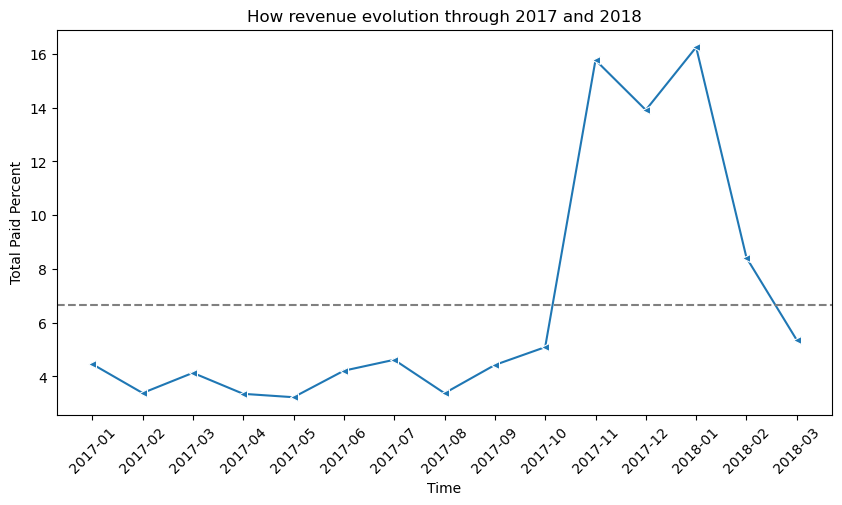

In [273]:
plt.subplots(figsize=(10,5))

p=sns.lineplot(data=orderlines2_month,x='year_month',y='total_paid_perc',marker='<')

p.axhline(
    orderlines2_month['total_paid_perc'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('Time') 
plt.ylabel('Total Paid Percent') 
plt.title('How revenue evolution through 2017 and 2018') 
plt.xticks(rotation=45)
plt.show()

## Revenue and weekdays

In [90]:
orders_compl = orders2.query('state == "Completed"')
orders_compl

,order_id,created_date,total_paid,state,check_orders
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
5,245275,2017-06-28 11:35:37,149.00,Completed,True
6,245595,2017-01-21 12:52:47,112.97,Completed,True
...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True
204423,527070,2018-03-14 11:50:48,24.97,Completed,True
204426,527074,2018-03-14 11:51:42,24.97,Completed,True
204444,527096,2018-03-14 11:58:40,34.96,Completed,True


In [116]:
orders_new = orders_compl.assign(year = orders['created_date'].dt.strftime('%Y'), 
             month = orders_compl['created_date'].dt.strftime('%b'),
             day = orders_compl['created_date'].dt.strftime('%A'))

day
Monday      3157528.75
Friday      2632860.30
Wednesday   2613447.69
Tuesday     2553186.82
Thursday    2510786.30
Sunday      1313793.66
Saturday    1125456.37
Name: total_paid, dtype: float64

##  Revenue over time in days for months with most revenue only

In [118]:
orders_new.groupby(['month', 'year']).total_paid.sum().sort_values(ascending = False)

month  year
Nov    2017   2949487.12
Jan    2018   1960839.27
Dec    2017   1897507.75
Jan    2017   1191437.34
Jul    2017   1127172.80
Oct    2017   1087801.23
Feb    2018   1069705.72
Sep    2017    861186.73
Aug    2017    722055.81
Jun    2017    690049.94
May    2017    646147.86
Feb    2017    623896.30
Apr    2017    486962.21
Mar    2018    476872.50
       2017    115937.31
Name: total_paid, dtype: float64

In [126]:
(orders_new
           .query('month==["Jan","Nov","Dec","Jul"]')
           .groupby(['year','month'])['total_paid'].sum().sort_values(ascending=False)
)


year  month
2018  Jan     20882830.53
2017  Nov     20337309.73
      Dec     17945465.53
      Jul      6058250.68
      Jan      5821454.81
Name: total_paid, dtype: float64

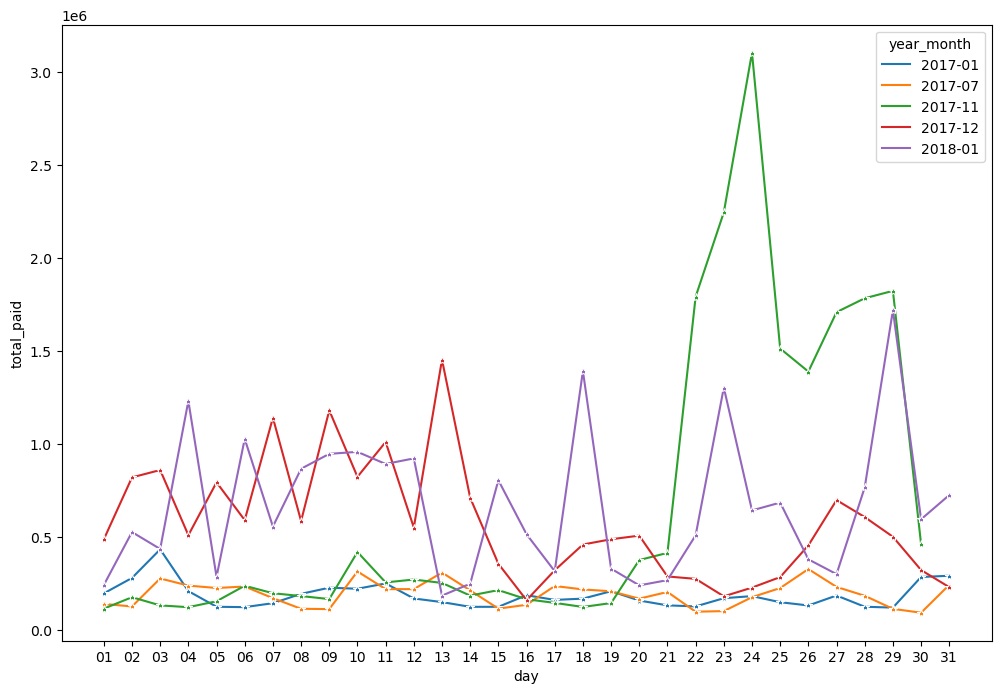

In [128]:
orders_plot = (orders2.assign
               (
           year_month = orders['created_date'].dt.strftime('%Y-%m'),
           day = orders['created_date'].dt.strftime('%d')
               )
          .query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
          .groupby(['year_month','day'])
          .agg({'total_paid':'sum'})
          .reset_index()
)

In [129]:
orders_plot.head(10) 

,year_month,day,total_paid
0,2017-01,01,198947.42
1,2017-01,02,281905.91
2,2017-01,03,435548.82
3,2017-01,04,211052.72
4,2017-01,05,126833.03
5,2017-01,06,124880.18
6,2017-01,07,146149.69
7,2017-01,08,196404.93
8,2017-01,09,229473.31
9,2017-01,10,223813.13


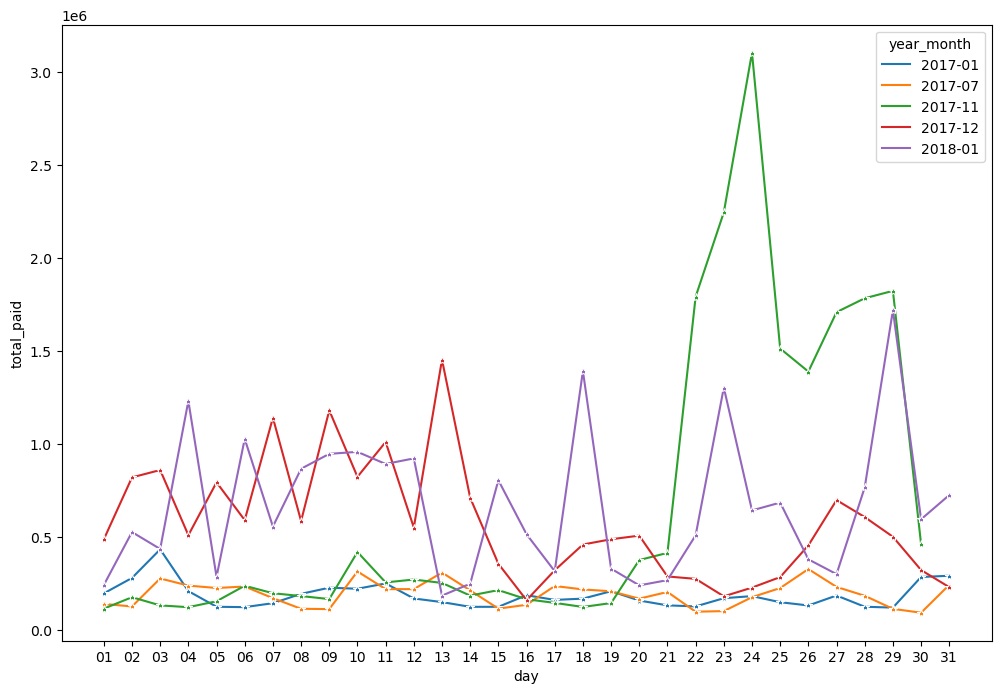

In [130]:
plt.subplots(figsize=(12, 8))

p=sns.lineplot(
    data= orders_plot,
    x='day', 
    y='total_paid', 
    hue='year_month',marker='*')  
#orders_new.loc[orders_new.year_month=='2017-11']

24-11-2017---(total paid 3106027.82) Black Fri. Sale (the sales baginn 2 days from Black Fri.)

27-11-2017-   Cyber day sale(continue 2 days)

12.2017 Chrismas Sales( gift buying for Chrismas)

01.2017/01.2018 January Sale, sales held after Chris. to encourage customers back to the shops



## Revenue weekdays

In [136]:
orders_new.groupby('day').total_paid.mean().sort_values(ascending = False)

day
Wednesday   2451710.43
Thursday    2356750.96
Monday      2285386.75
Tuesday     2198621.30
Friday      1871382.41
Sunday      1528230.23
Saturday    1516980.17
Name: total_paid, dtype: float64

In [145]:
orders_new_barplot = (
           orders_compl.assign 
            (
           year =orders['created_date'].dt.strftime('%Y'), 
           month =   orders['created_date'].dt.strftime('%b'),
           day =   orders['created_date'].dt.strftime('%A')
            )
           .groupby('day')
           .agg({'total_paid':'sum'})
           .reset_index()
           .sort_values('total_paid', ascending=False)
)
orders_new_barplot

,day,total_paid
1,Monday,3157528.75
0,Friday,2632860.30
6,Wednesday,2613447.69
5,Tuesday,2553186.82
4,Thursday,2510786.30
3,Sunday,1313793.66
2,Saturday,1125456.37


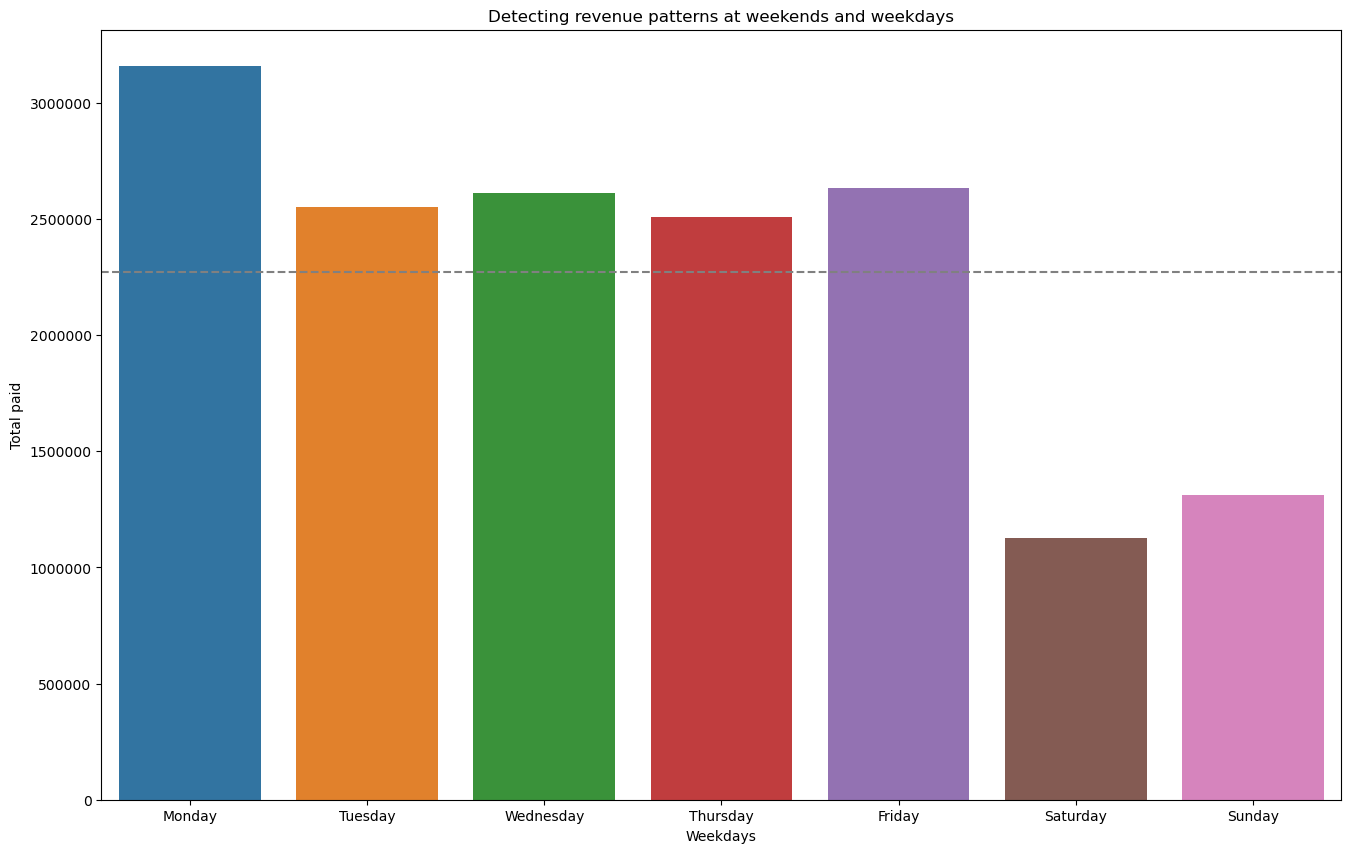

In [148]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(16, 10))

p = sns.barplot(
    data=orders_new_barplot, # dataframe we will use to look for the columns information
    x='day', # x values on our chart
    y='total_paid', # y values on our chart
    ci = None,  # group color in our chart
    order=day # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    orders_new_barplot['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Weekdays') # x label name
plt.ylabel('Total paid') 
plt.title('Detecting revenue patterns at weekends and weekdays') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

## Revenue evolution in hours for the months with most revenue

If we can see that more orders are placed at 3pm compared to 3am, we know when is best to do maintenance work on the servers.

In [190]:
orders_hours = (
orders_compl.assign
        (
           year = orders['created_date'].dt.strftime('%Y'), 
           month = orders_compl['created_date'].dt.strftime('%b'),
           day = orders_compl['created_date'].dt.strftime('%A')
        )
               )

In [191]:
orders_hours['hour'] = orders_hours['created_date'].dt.hour
orders_hours

,order_id,created_date,total_paid,state,check_orders,year,month,day,hour
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov,Monday,13
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec,Sunday,17
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb,Thursday,10
5,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,Jun,Wednesday,11
6,245595,2017-01-21 12:52:47,112.97,Completed,True,2017,Jan,Saturday,12
...,...,...,...,...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,Mar,Wednesday,11
204423,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,Mar,Wednesday,11
204426,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,Mar,Wednesday,11
204444,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,Mar,Wednesday,11


In [192]:
orders_hours = orders_hours.assign(year_month = orders['created_date'].dt.strftime('%Y-%m'),
                day = orders['created_date'].dt.strftime('%d'))
orders_hours

,order_id,created_date,total_paid,state,check_orders,year,month,day,hour,year_month
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov,06,13,2017-11
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec,31,17,2017-12
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb,16,10,2017-02
5,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,Jun,28,11,2017-06
6,245595,2017-01-21 12:52:47,112.97,Completed,True,2017,Jan,21,12,2017-01
...,...,...,...,...,...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,Mar,14,11,2018-03
204423,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,Mar,14,11,2018-03
204426,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,Mar,14,11,2018-03
204444,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,Mar,14,11,2018-03


In [194]:
orders_hours_barplot = (orders_hours.query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
           .groupby('hour')
    .agg({'total_paid':'sum'})
    .reset_index()
)
orders_hours_barplot

,hour,total_paid
0,0,291828.07
1,1,129279.50
2,2,57419.61
3,3,33805.41
4,4,17048.97
5,5,14309.98
6,6,29539.75
7,7,81221.21
8,8,201801.35
9,9,387415.39


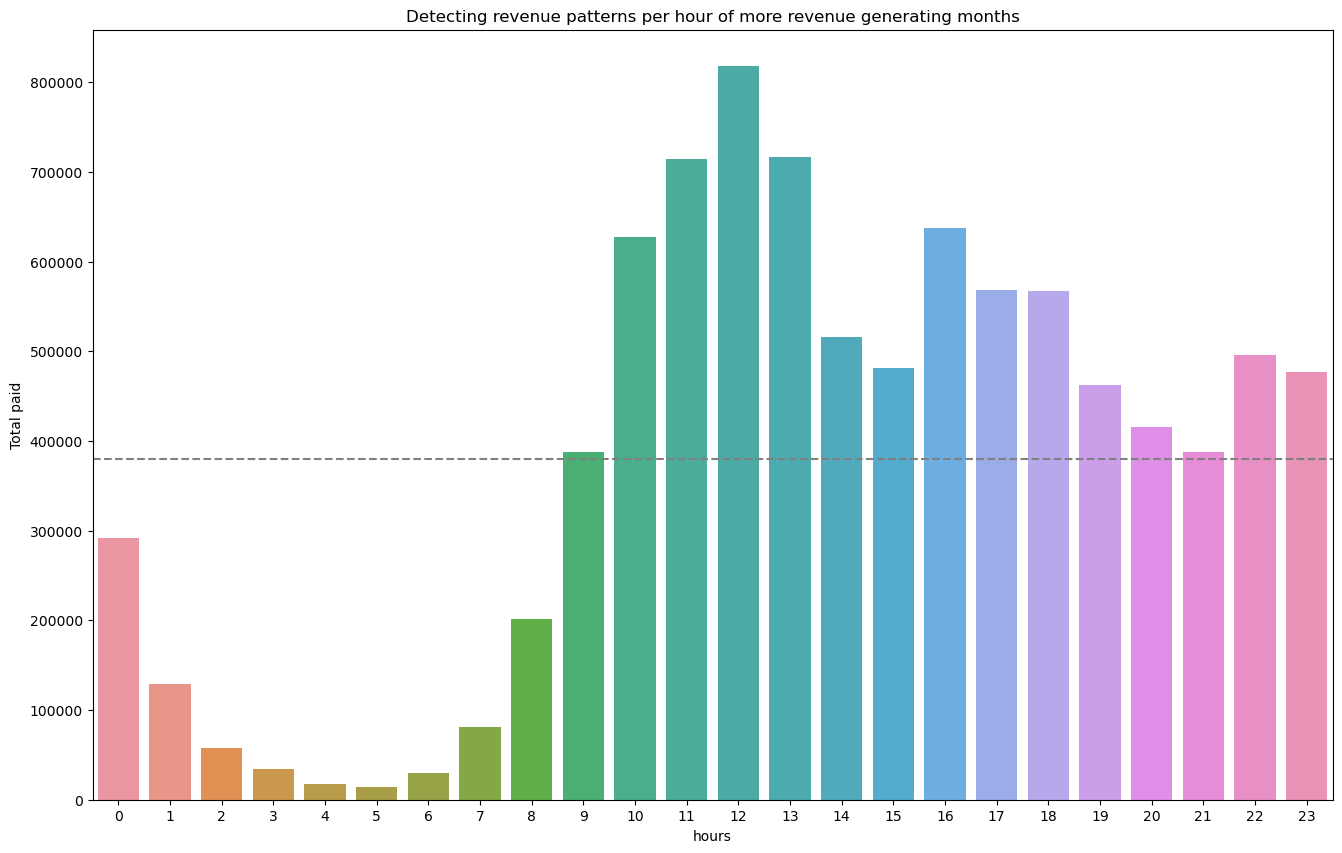

In [204]:
#Detecting revenue pattern per hour of more  revenue generating months. Not to show in presentation
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
hours = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', 
          '19', '20', '21', '22', '23']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(16, 10))

p = sns.barplot(
    data=orders_hours_barplot, # dataframe we will use to look for the columns information
    x= 'hour', # x values on our chart
    y='total_paid', # y values on our chart
    ci = None, # group color in our chart
    #order=hours # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    orders_hours_barplot['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('hours') # x label name
plt.ylabel('Total paid') 
plt.title('Detecting revenue patterns per hour of more revenue generating months') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

In [212]:
orders_hours_lineplot = (orders_hours.query('year_month==["2017-01","2017-07","2017-11","2017-12","2018-01"]')
           .groupby(['year_month', 'hour', 'day'])
           .agg({'total_paid':'sum'})
           .reset_index()
)
orders_hours_lineplot

,year_month,hour,day,total_paid
0,2017-01,0,02,2300.60
1,2017-01,0,03,3651.36
2,2017-01,0,04,414.61
3,2017-01,0,05,2125.81
4,2017-01,0,06,725.89
...,...,...,...,...
3111,2018-01,23,27,174.97
3112,2018-01,23,28,5301.05
3113,2018-01,23,29,6952.03
3114,2018-01,23,30,3897.65


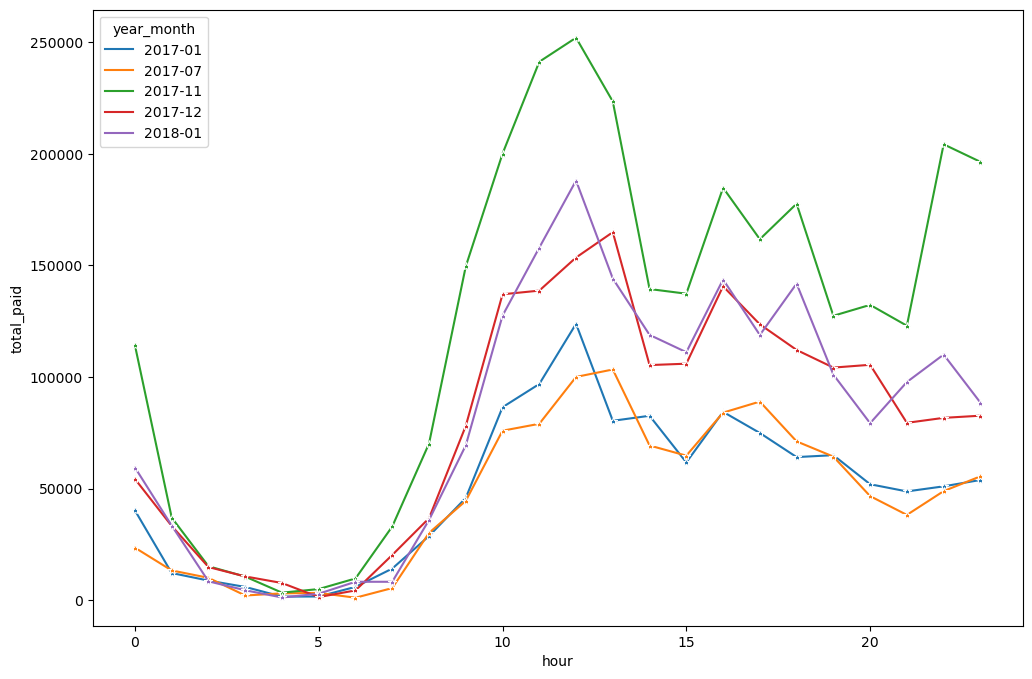

In [211]:
# Detecting revenue pattern per hour of more revenue generating months
plt.subplots(figsize=(12, 8))

p=sns.lineplot(
    data= orders_hours_lineplot,
    x='hour', 
    y='total_paid', 
    hue='year_month',marker='*')  
#orders_new.loc[orders_new.year_month=='2017-11']

### Revenue and hour on the day to the top revenue months after outliers removed

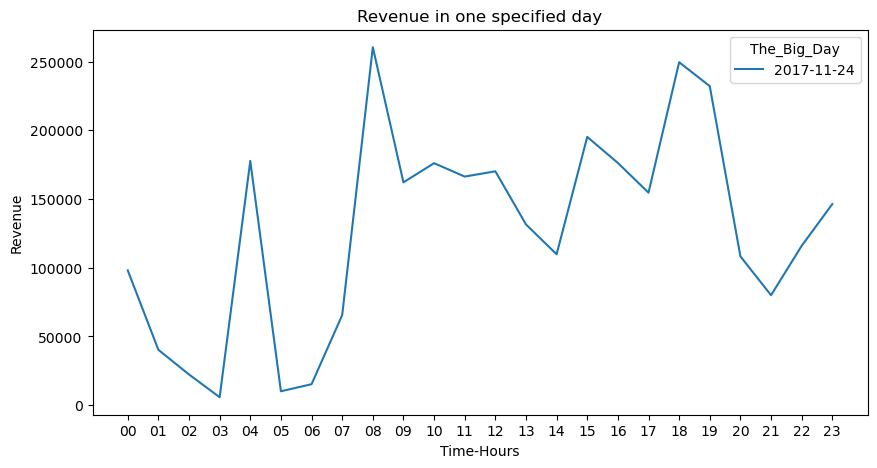

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines2['date'])

orderlines2_new = (orderlines2.assign(
           hour = orderlines2['date'].dt.strftime('%H'),
           The_Big_Day= orderlines2['date'].dt.strftime('%Y-%m-%d'))
          .assign(total_paid=lambda x: x['unit_price']* x['product_quantity'])
           .query('The_Big_Day==["2017-11-24"]')
           .groupby(['hour','The_Big_Day'])
           .agg({'total_paid':'sum'})
           .reset_index())

plt.subplots(figsize=(10, 5))

p=sns.lineplot(
    data= orderlines2_new,
    x='hour', 
    y='total_paid', hue='The_Big_Day')

plt.xlabel('Time-Hours') 
plt.ylabel('Revenue') 
plt.title('Revenue in one specified day') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

# Evolution of Sales in quarters

### Using order csv quarters

In [274]:
#How sales evolution in quarters
import matplotlib.pyplot as plt
import seaborn as sns
orders2['created_date'] = pd.to_datetime(orders['created_date'])
orderlines2['date'] = pd.to_datetime(orderlines['date'])

orders2['quarters']=pd.qcut(orders['created_date'],q=5, labels=('2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1'))

orders_month=(orders2
              .query('state=="Completed"')
              .groupby('quarters')
              .agg({'total_paid':'sum'})
              .reset_index())

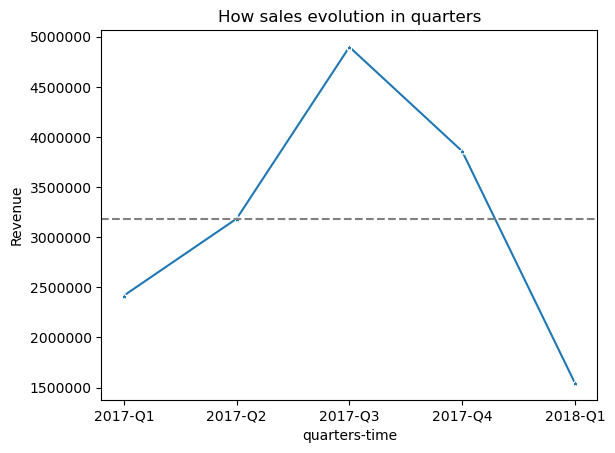

In [275]:
#sns.barplot(data=orders_month,x='month',y='order_id',hue='state',palette='colorblind')
p=sns.lineplot(data=orders_month,x='quarters',y='total_paid',marker='*')
p.axhline(
    orders_month['total_paid'].mean(),
    linestyle='--', 
    color='gray')

plt.xlabel('quarters-time') 
plt.ylabel('Revenue') 
plt.title('How sales evolution in quarters') 
plt.ticklabel_format(style='plain', axis='y') 
plt.show()